<a href="https://colab.research.google.com/github/mridulsahi/computer-vision-assignments/blob/main/101903128_CVLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np

input = cv2.imread('')
cv2_imshow('Hello world', input)

cv2.waitKey()
cv2.destroyAllWindows()

TypeError: ignored

# **ASSIGNMENT** **4**

1. CONTOURS

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
from google.colab.patches import cv2_imshow

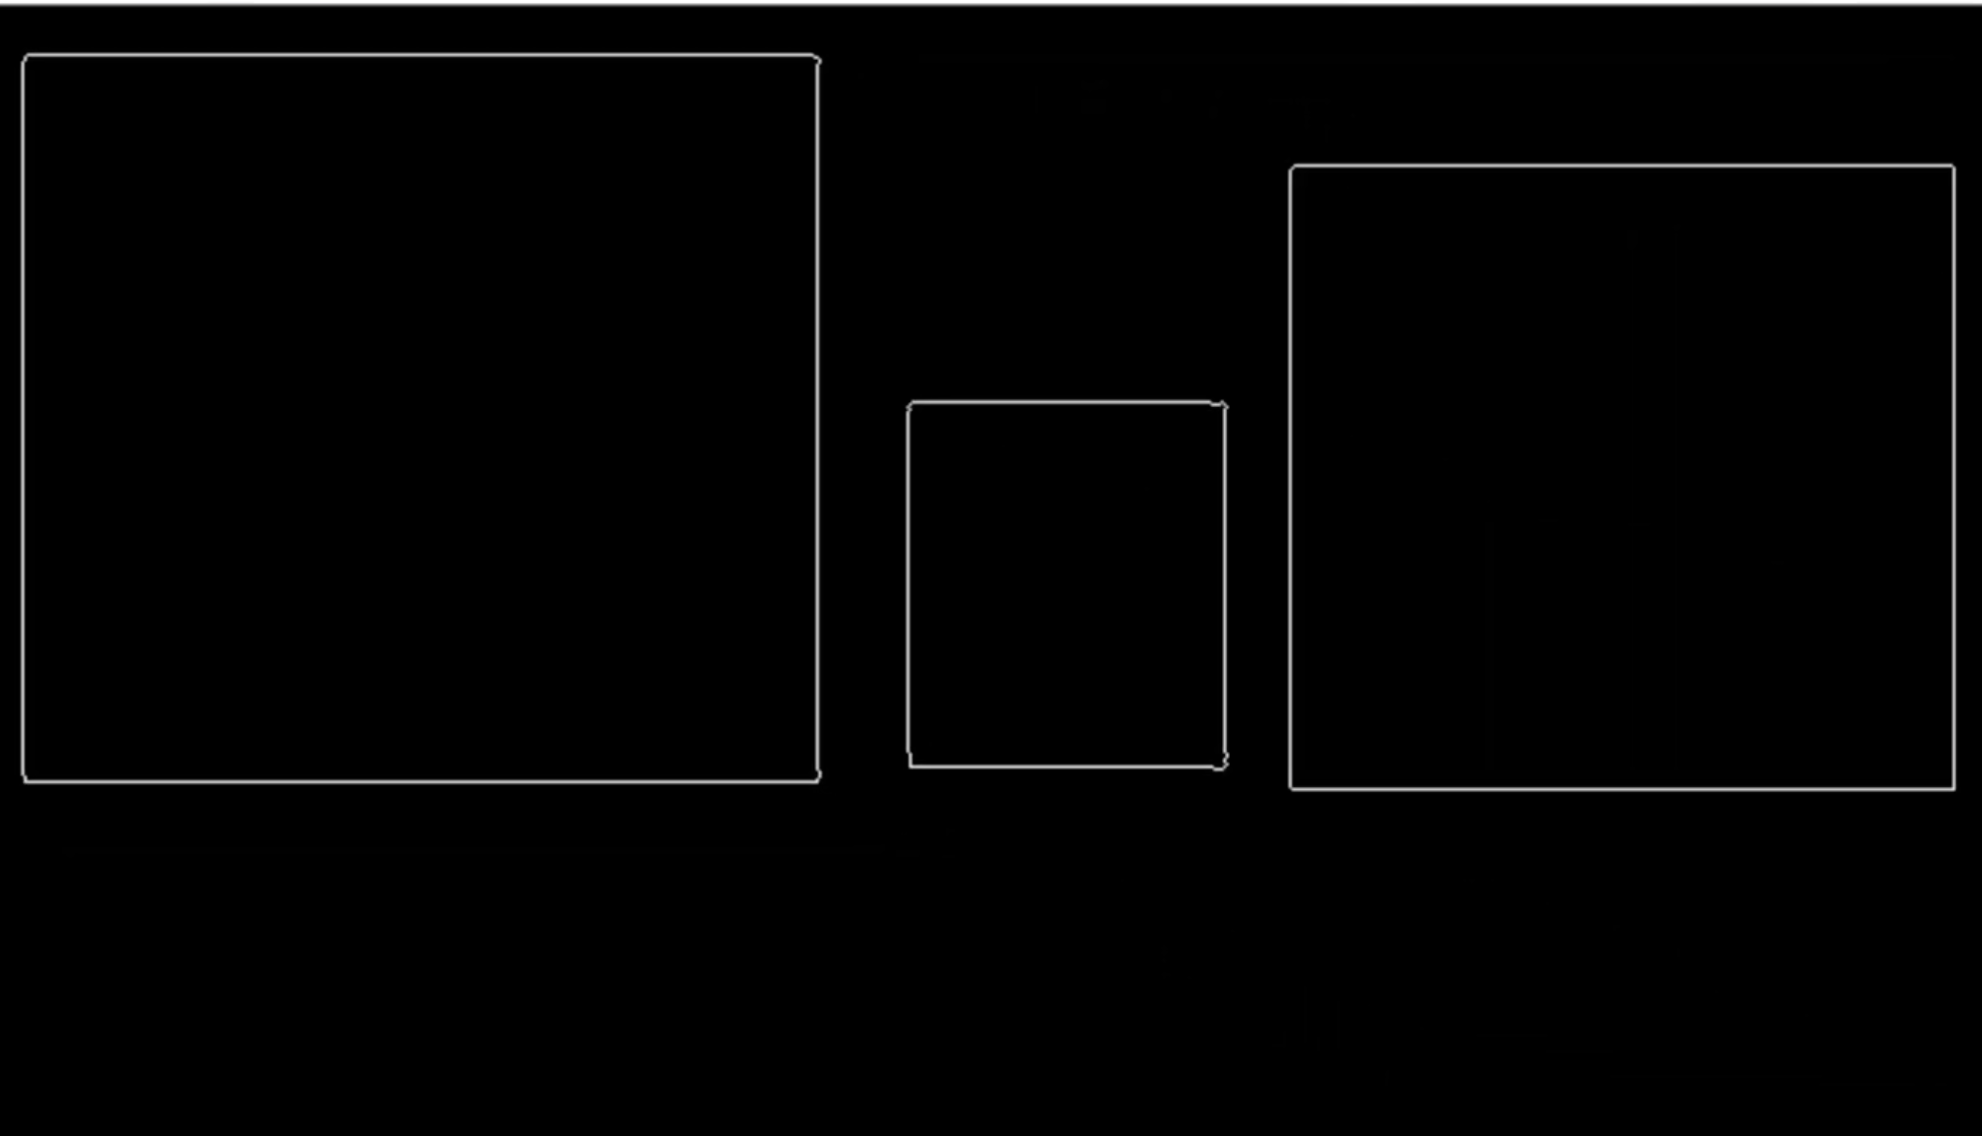

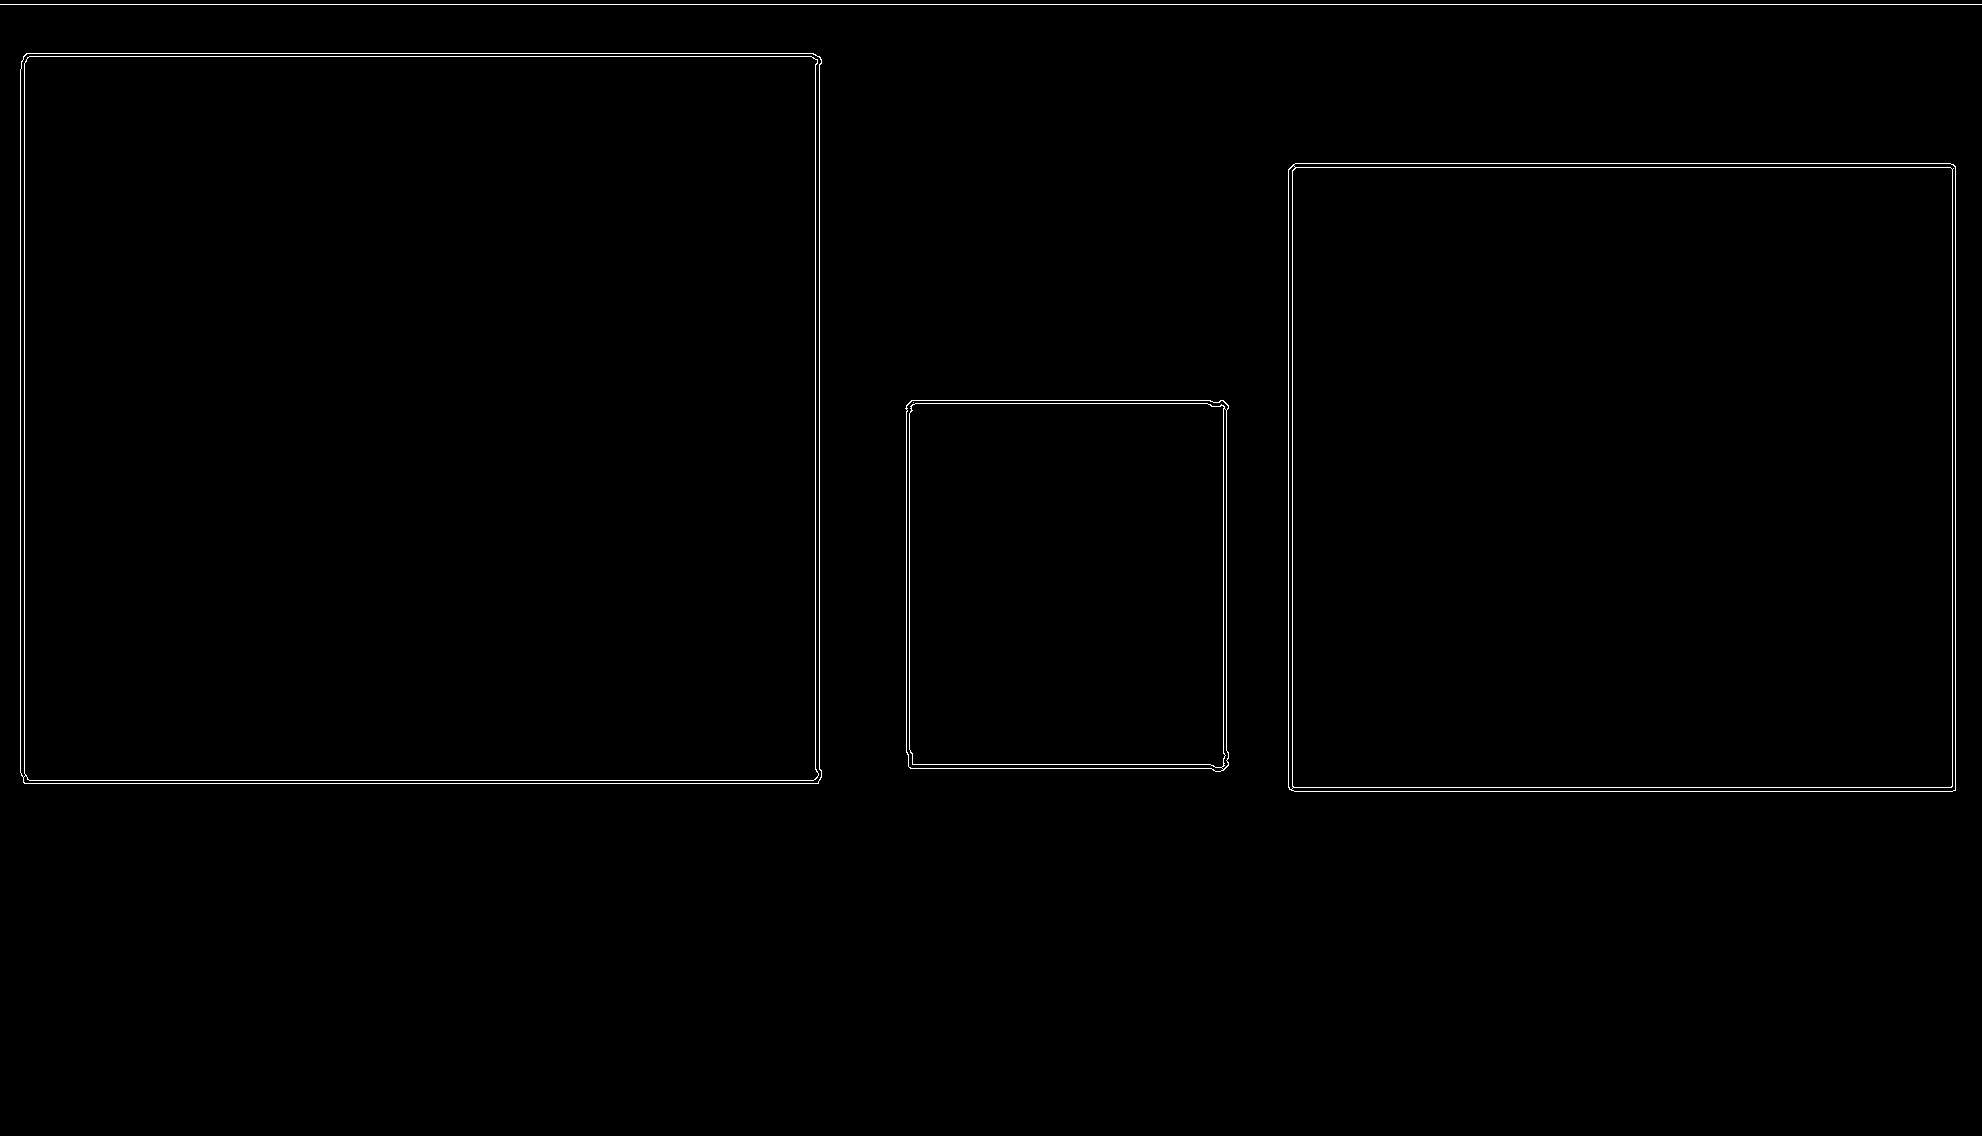

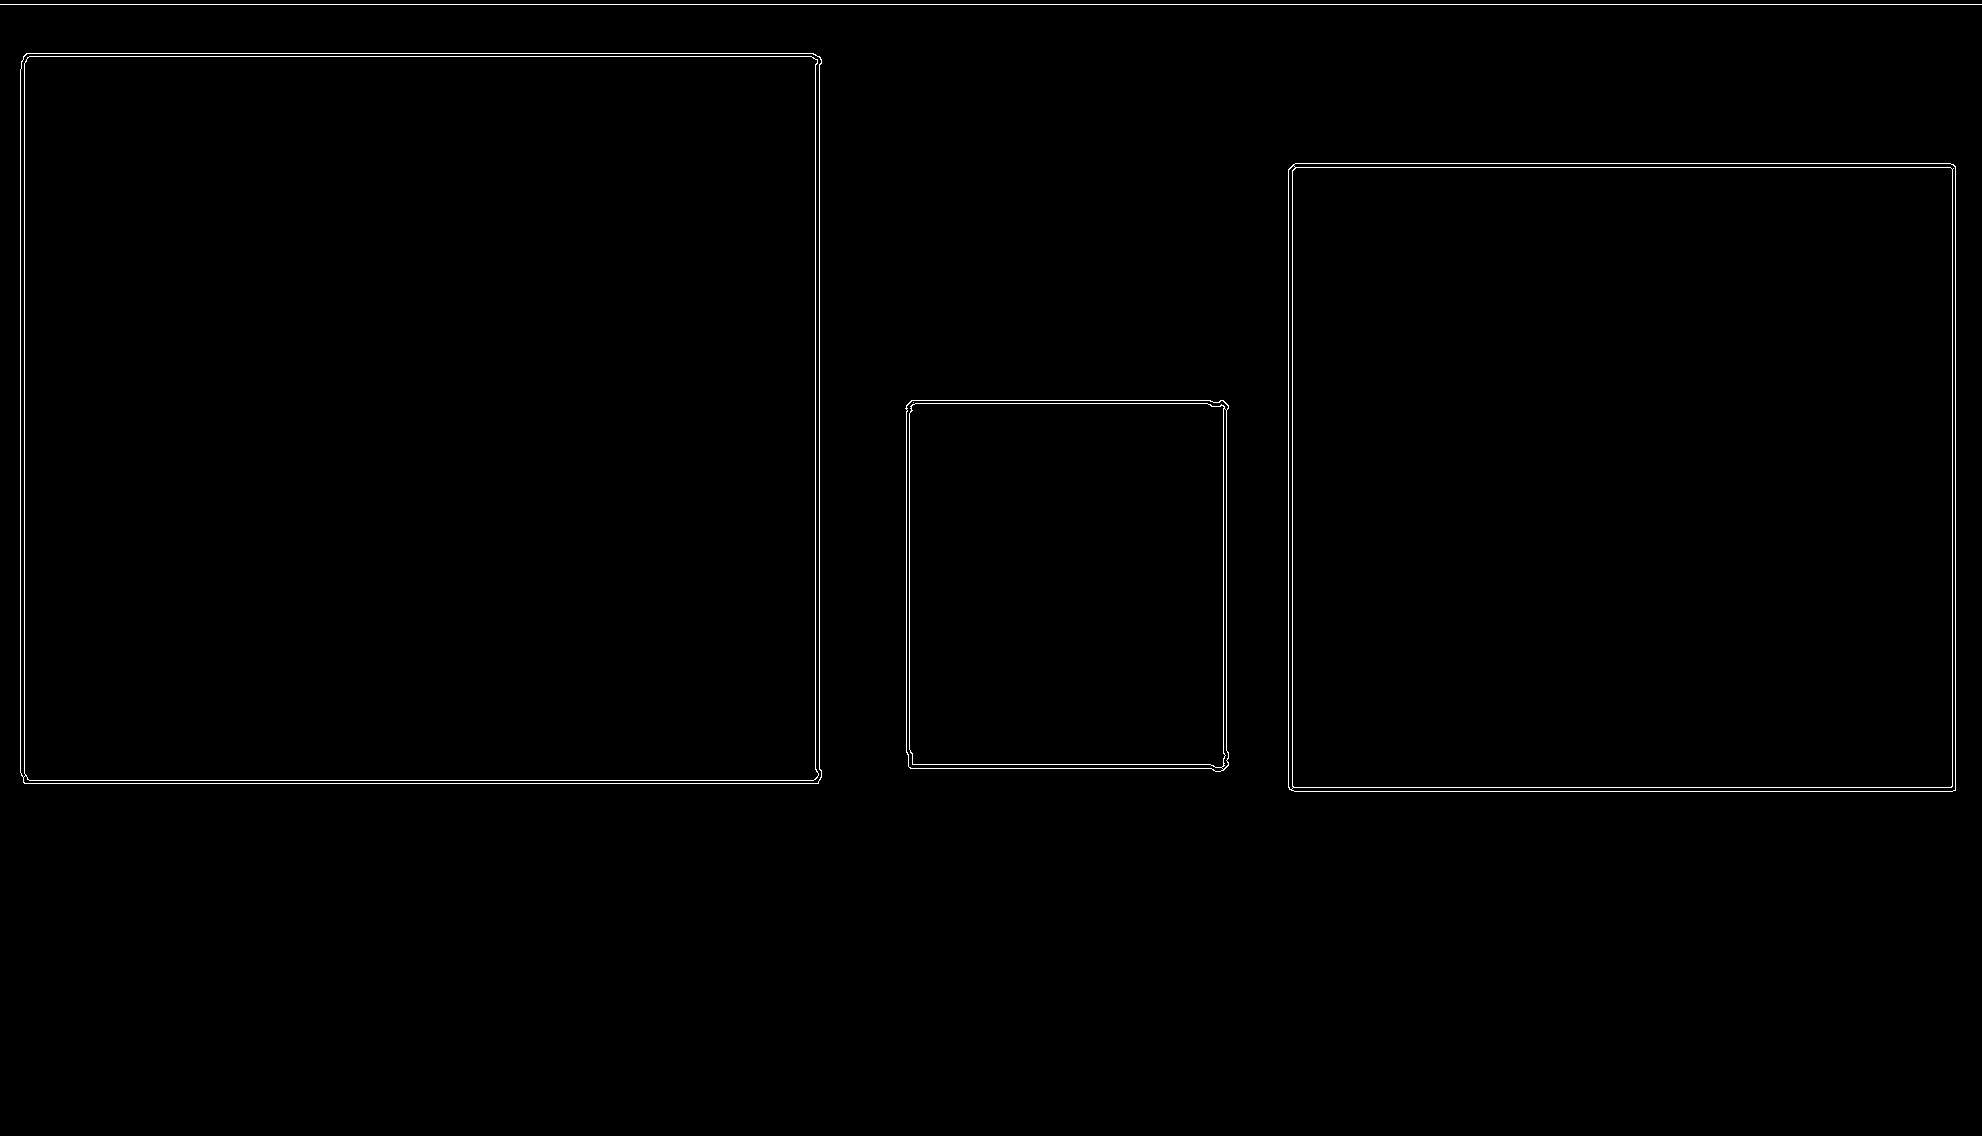

Number of Contours found = 4


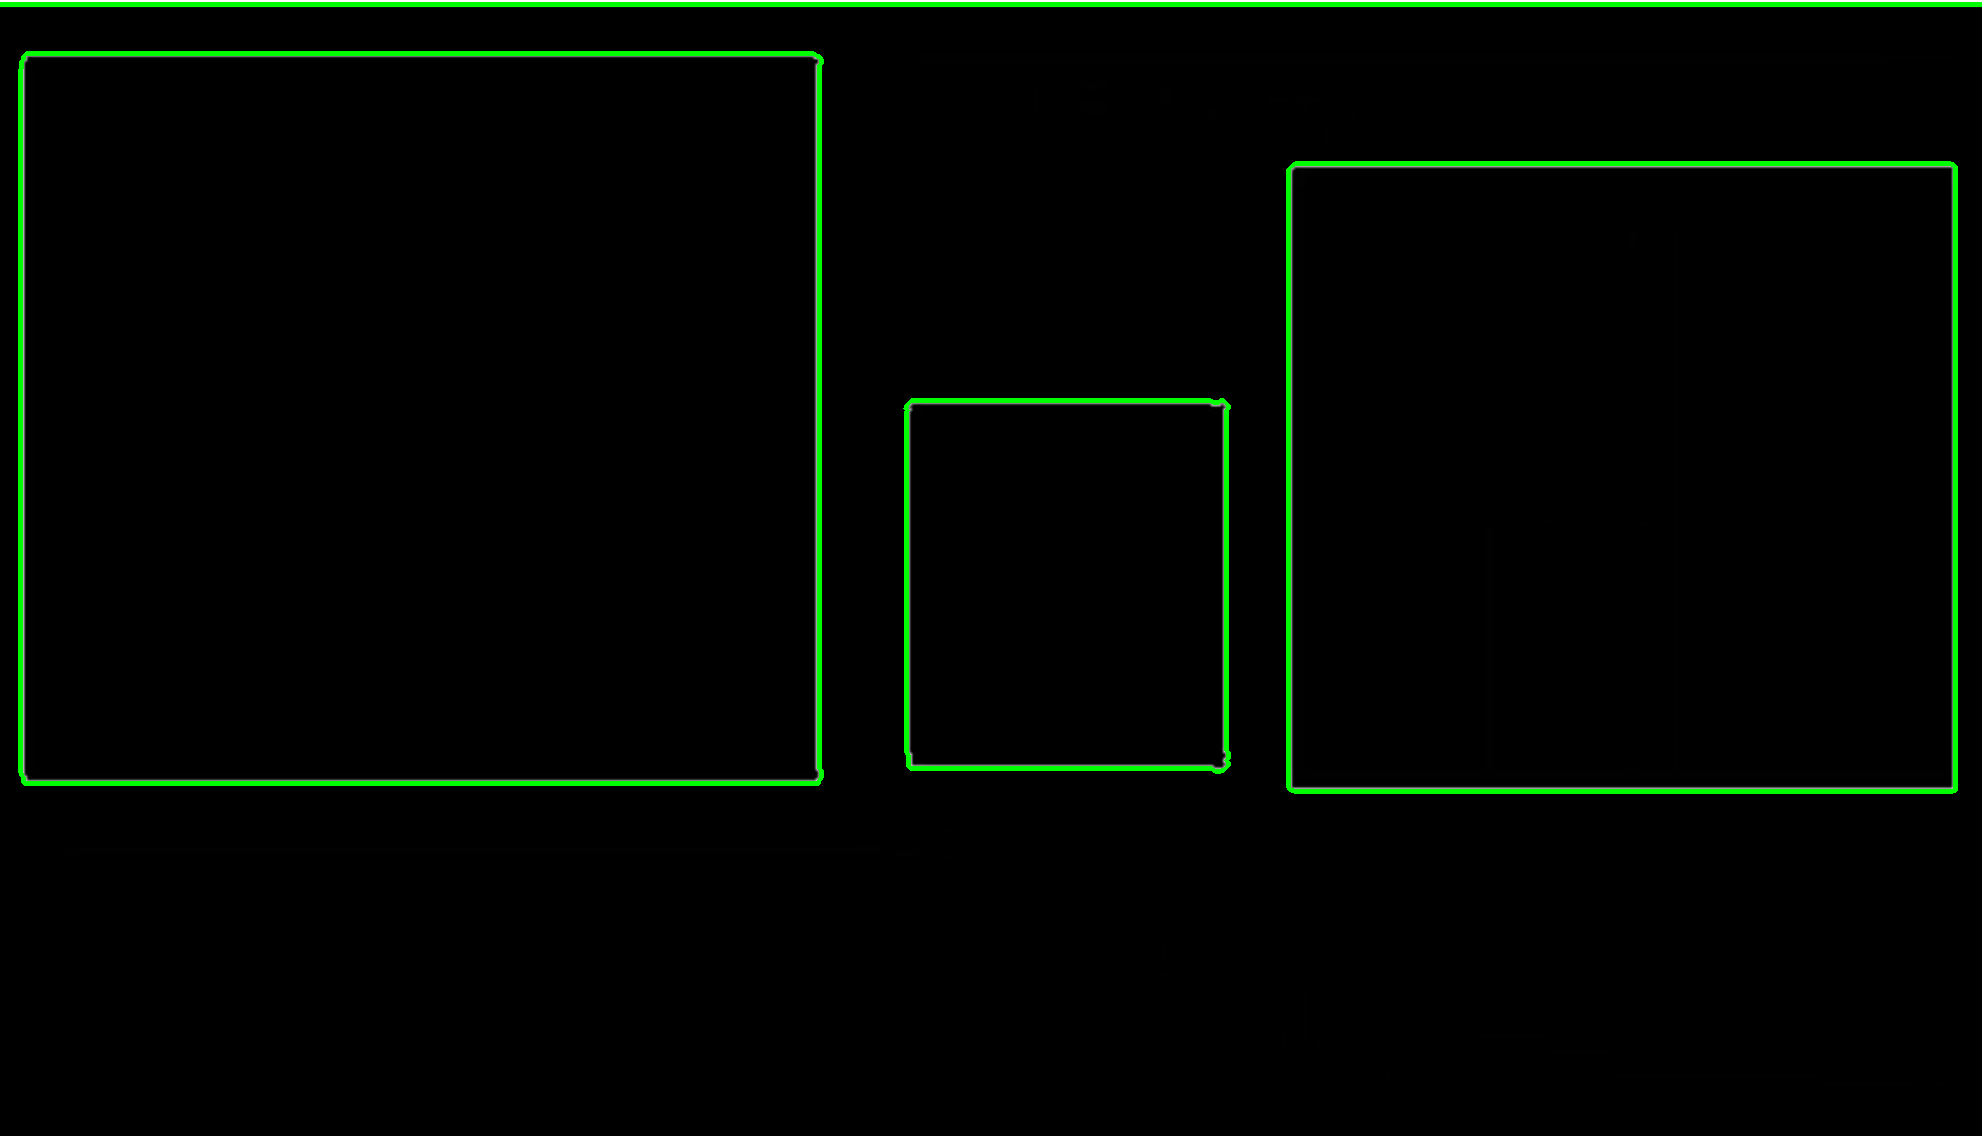

In [ ]:

import cv2
import numpy as np


# Let's load a simple image with 3 black squares
image = cv2.imread('/content/gdrive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/contour squares.png')
cv2_imshow(image)
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2_imshow(edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2_imshow(edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. SORTING CONTOURS


In [ ]:
from google.colab.patches import cv2_imshow

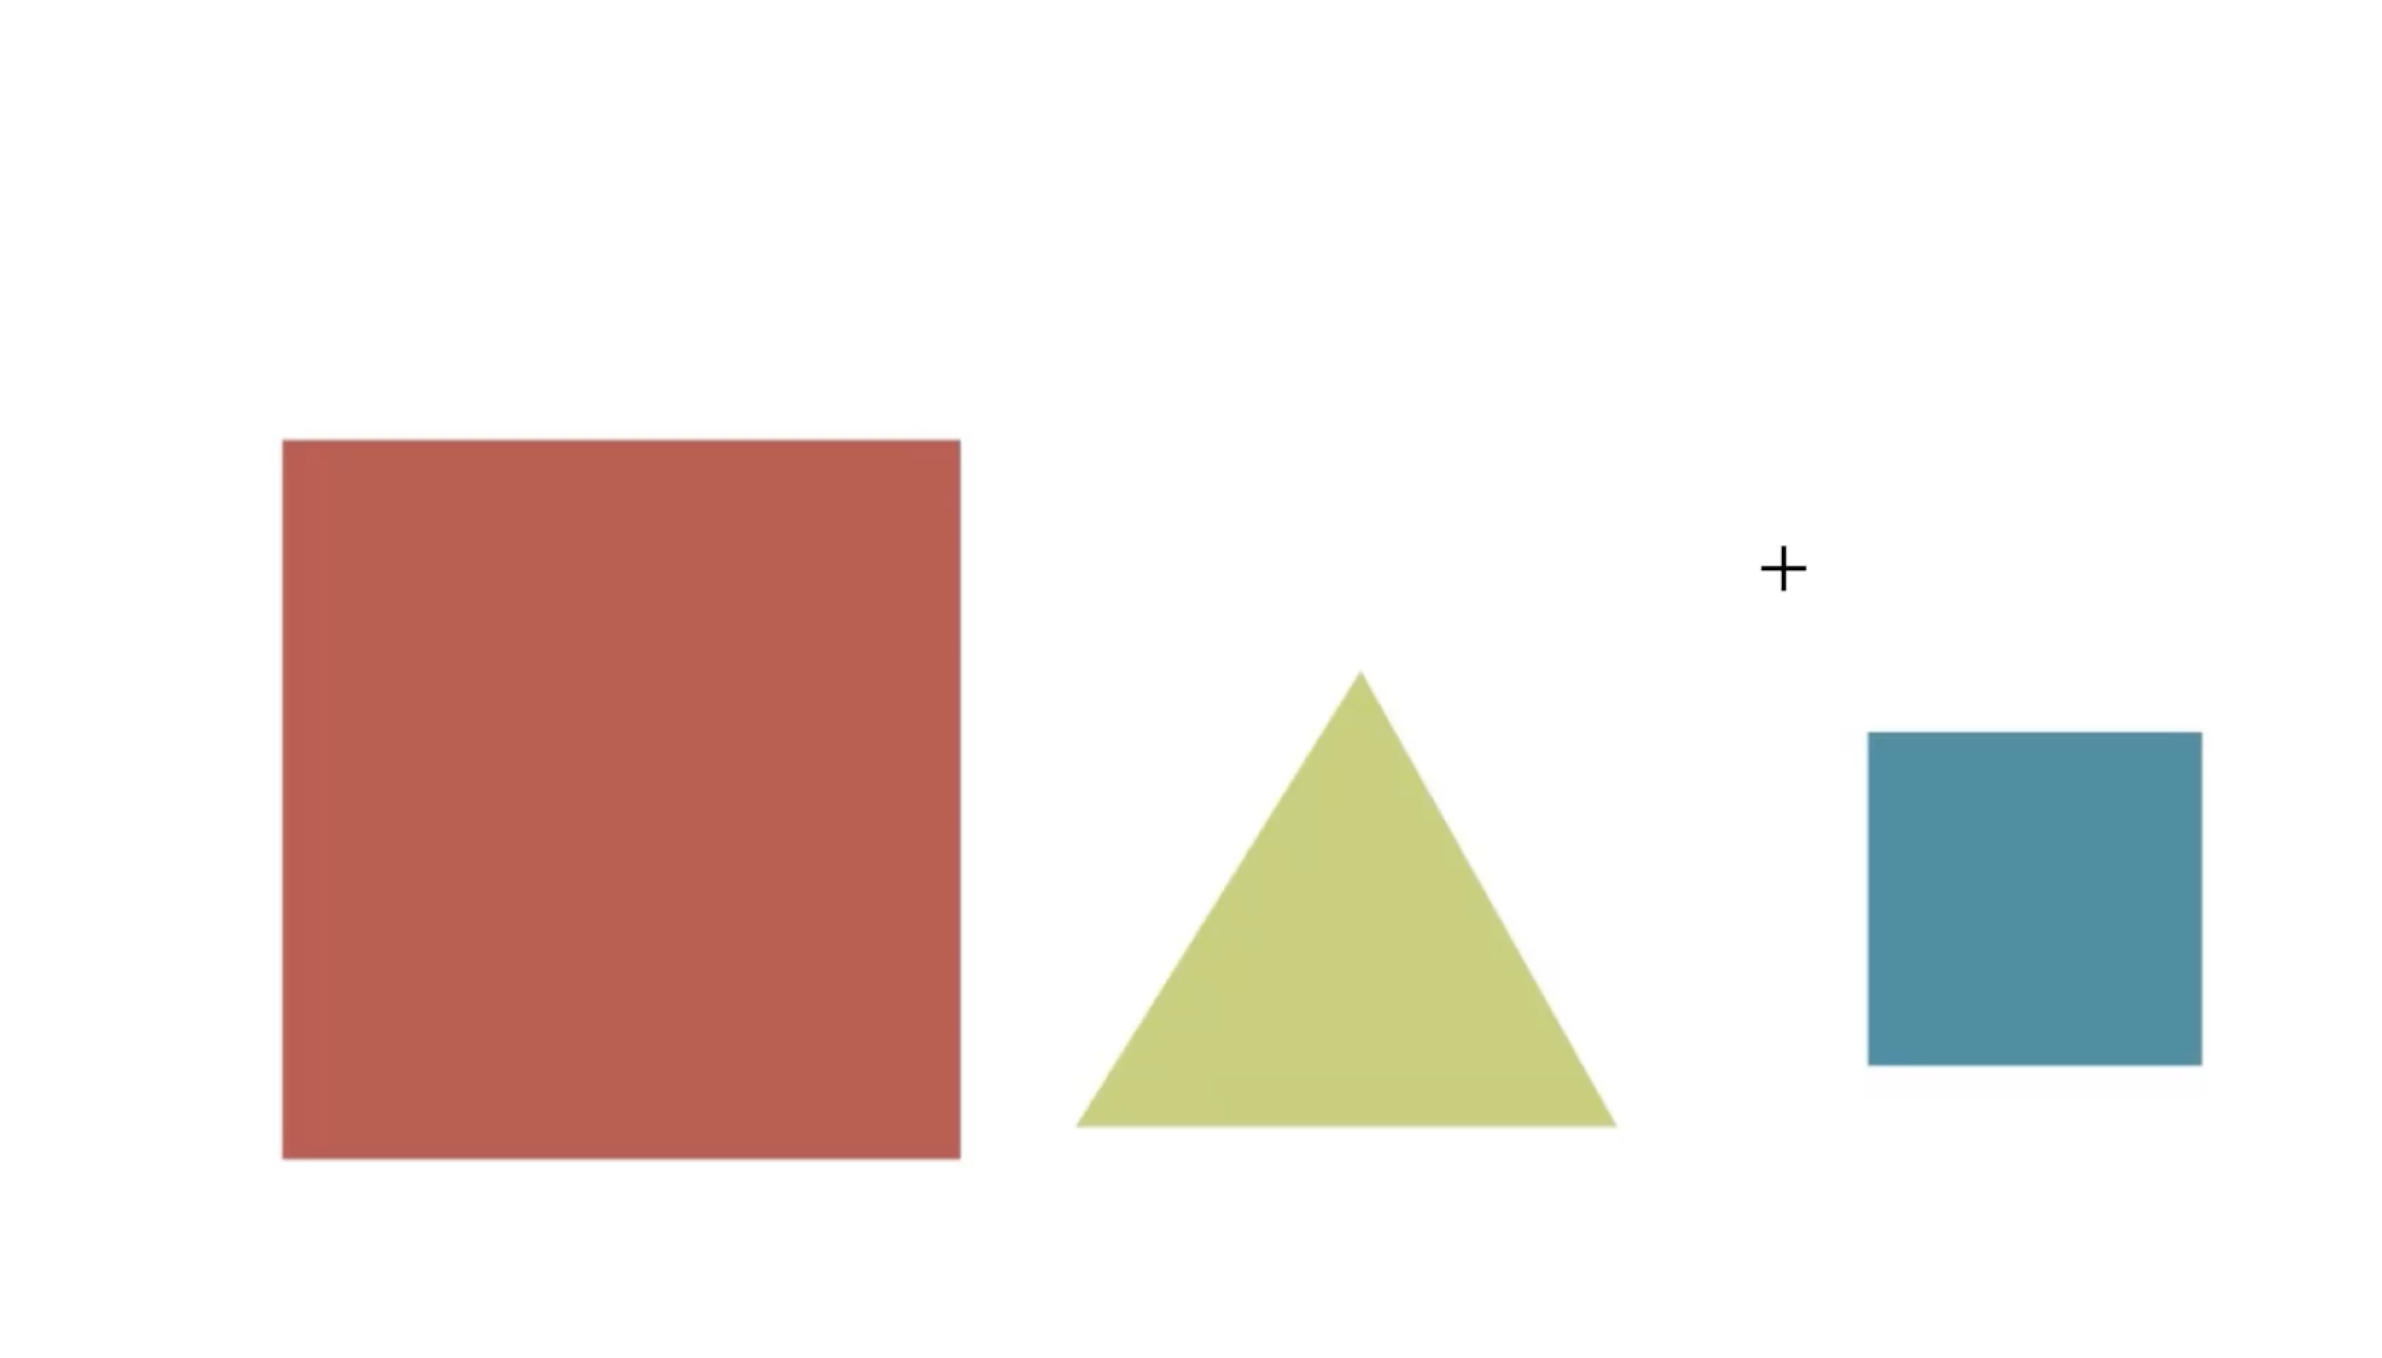

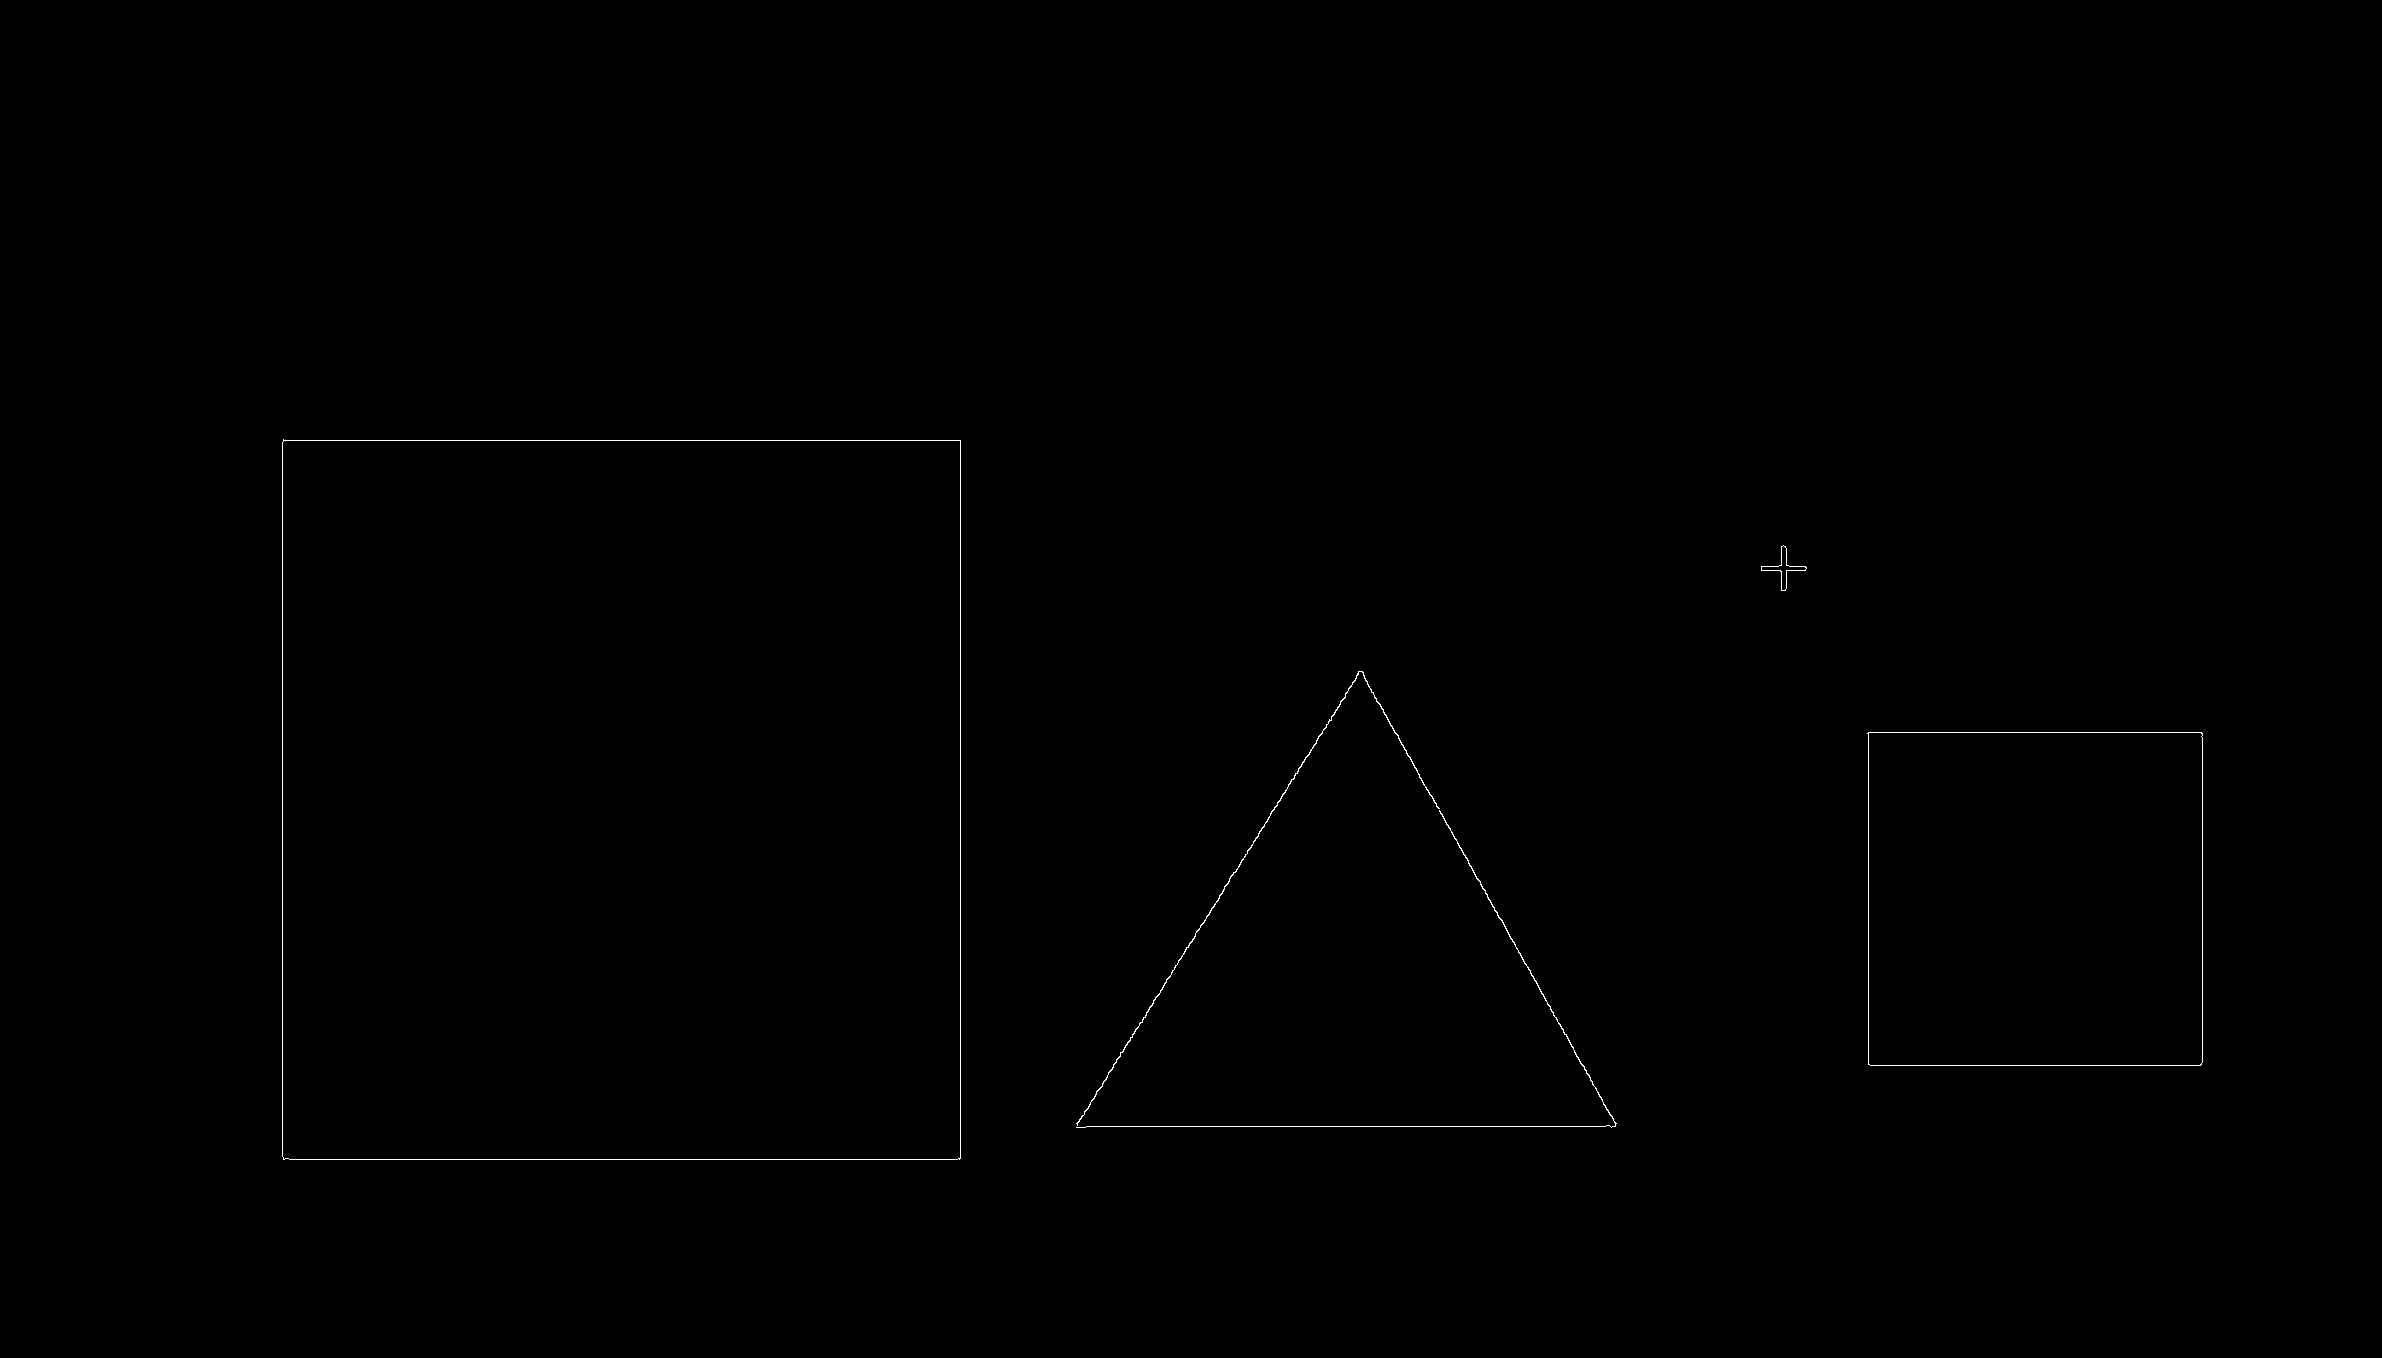

Number of contours found =  5


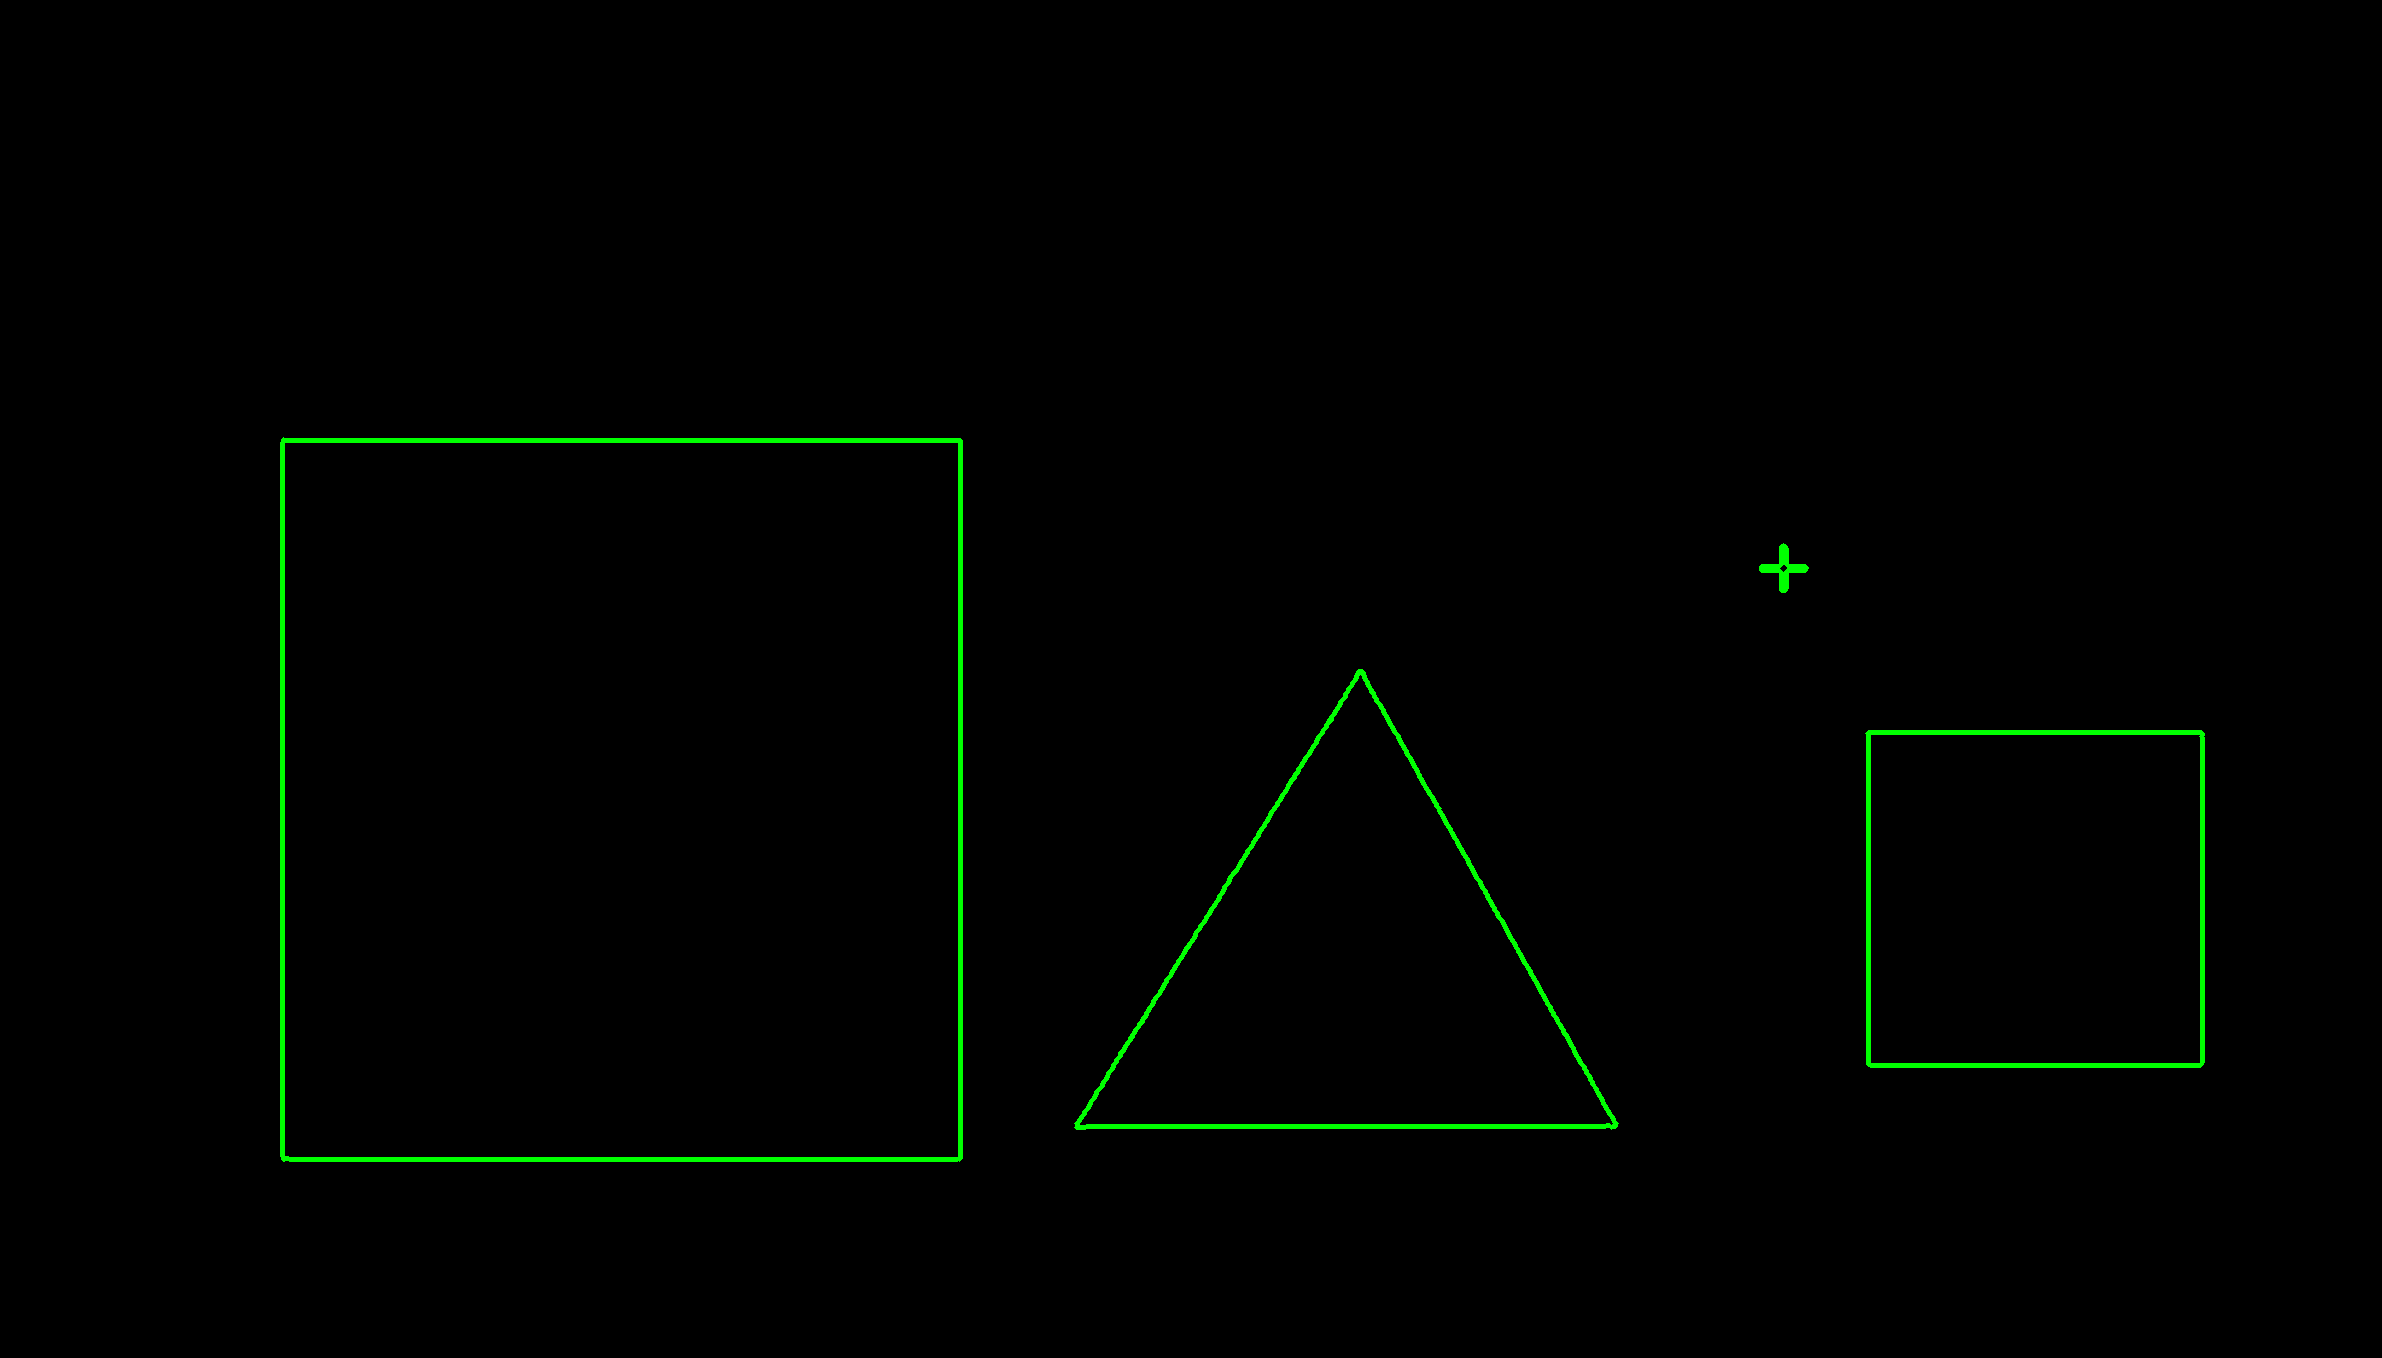

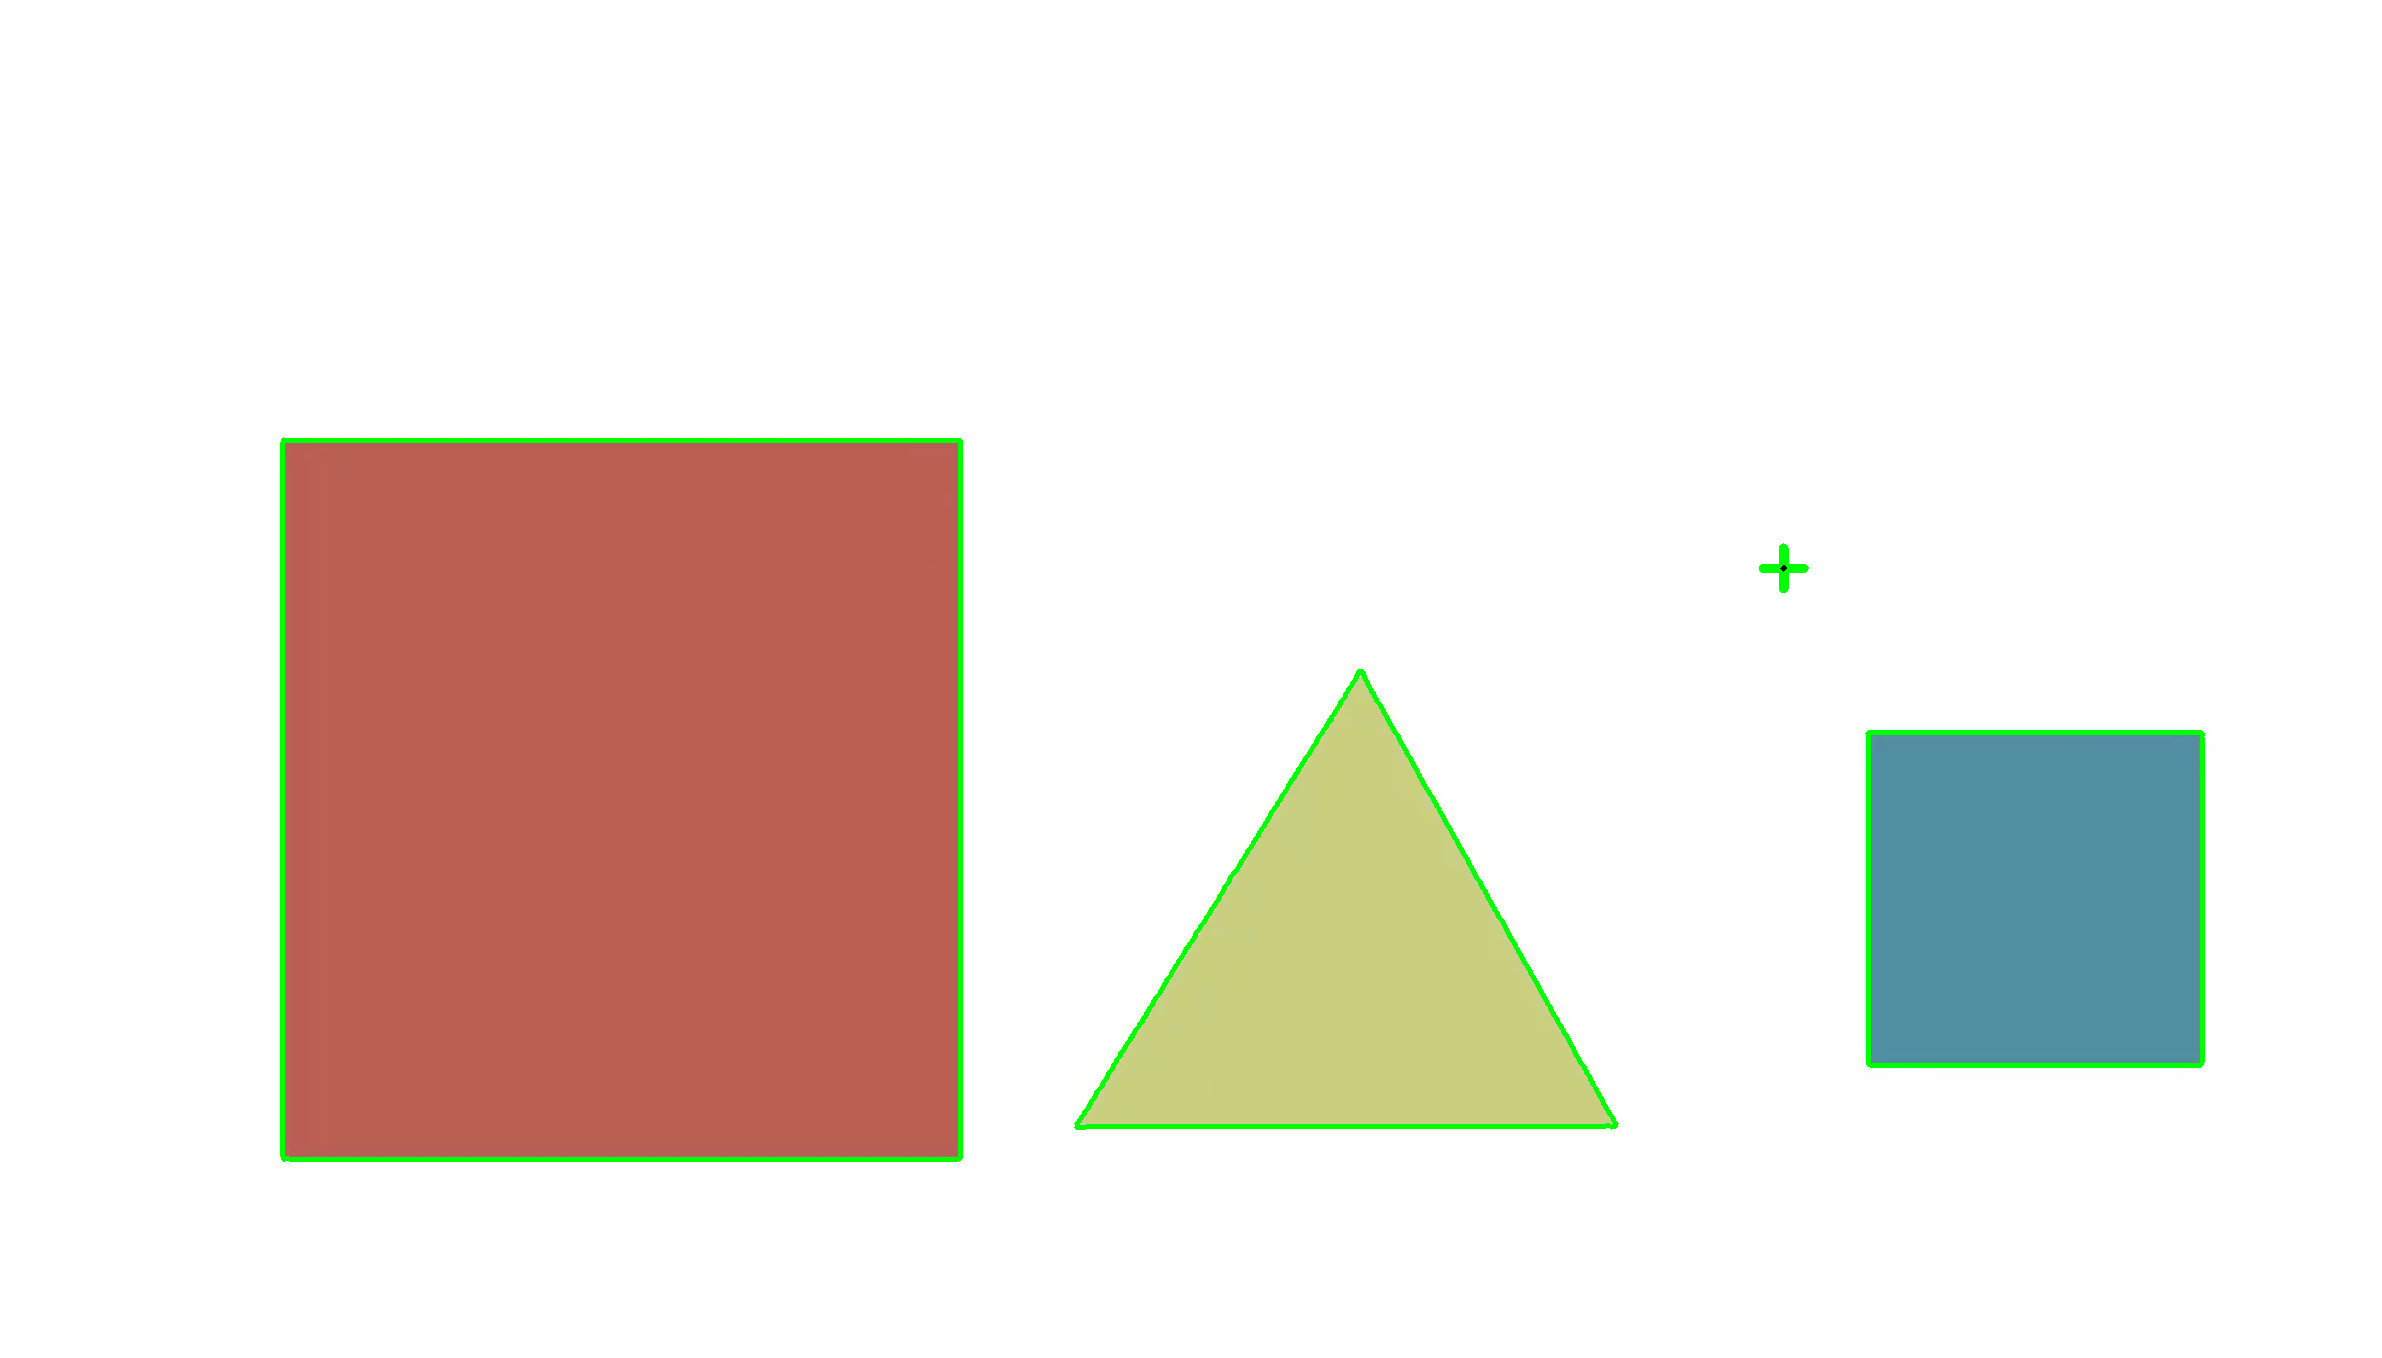

In [ ]:
import cv2
import numpy as np

# Load our image
image = cv2.imread('/content/gdrive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/bunch of shapes.png')
cv2_imshow(image)
cv2.waitKey(0)

# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image.shape[0], image.shape[1], 3))

# Create a copy of our original image
orginal_image = image

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
cv2_imshow(edged)
cv2.waitKey(0)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print ("Number of contours found = ", len(contours))

#Draw all contours
cv2.drawContours(blank_image, contours, -1, (0,255,0), 3)
cv2_imshow(blank_image)
cv2.waitKey(0)

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2_imshow(image)
cv2.waitKey(0)

cv2.destroyAllWindows()

SORTING BY AREA


In [ ]:
from google.colab.patches import cv2_imshow

Contor Areas before sorting
[162.0, 111217.0, 317.5, 384.5, 487473.0]
Contor Areas after sorting
[487473.0, 111217.0, 384.5, 317.5, 162.0]


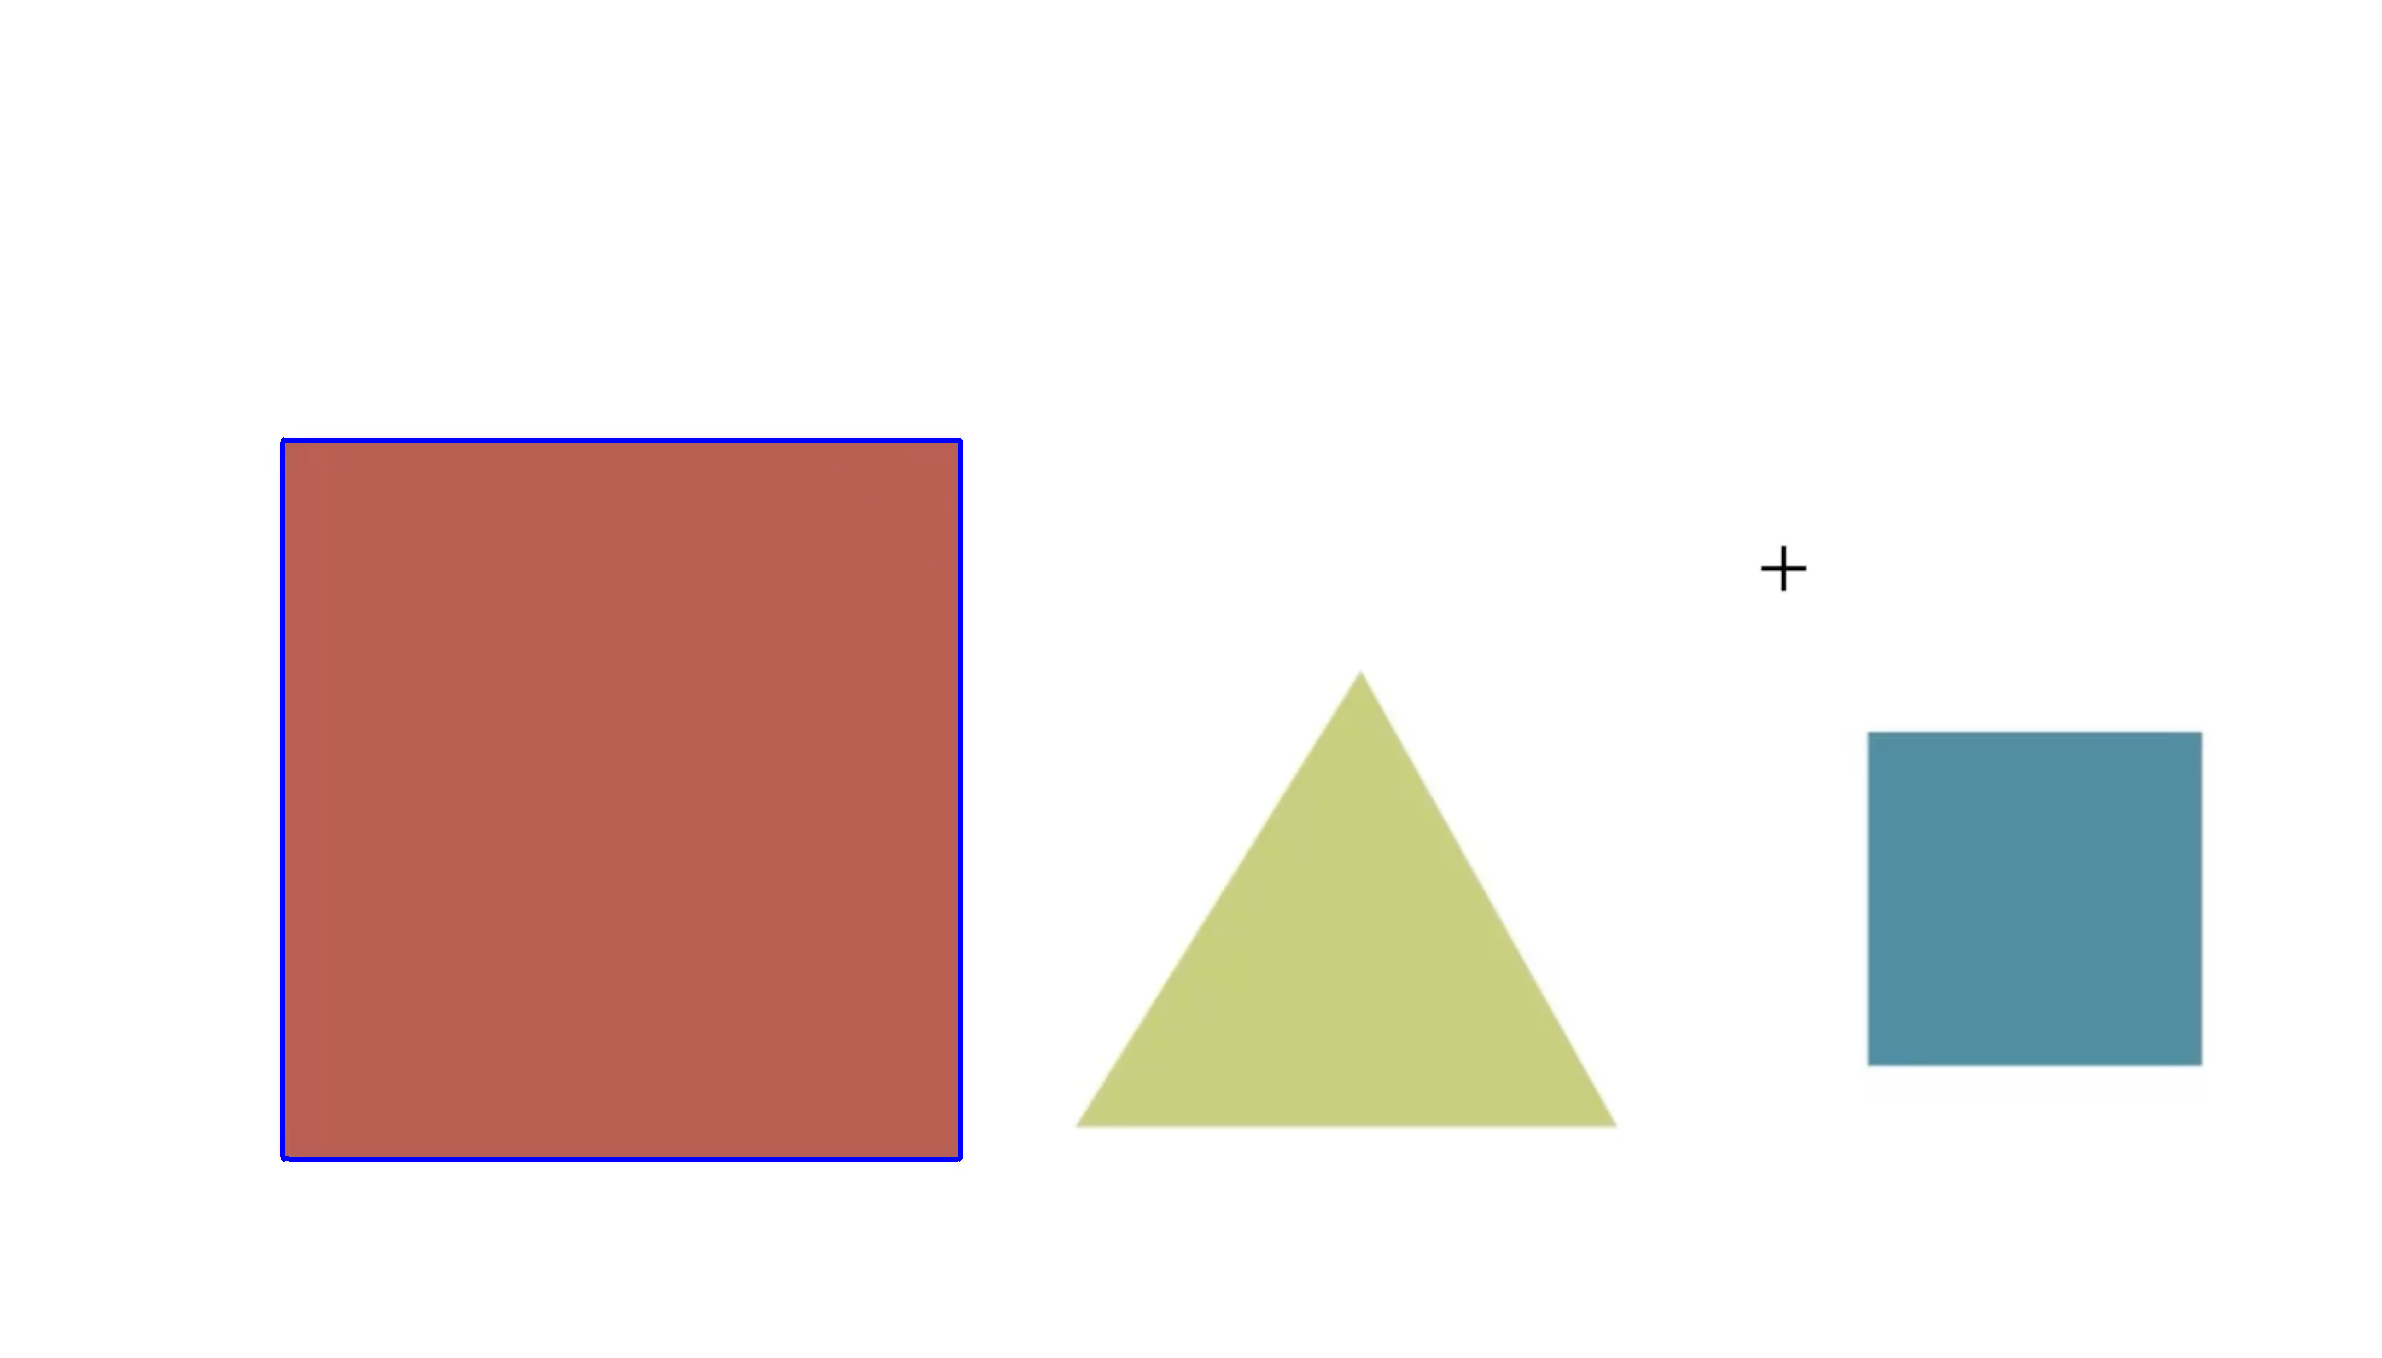

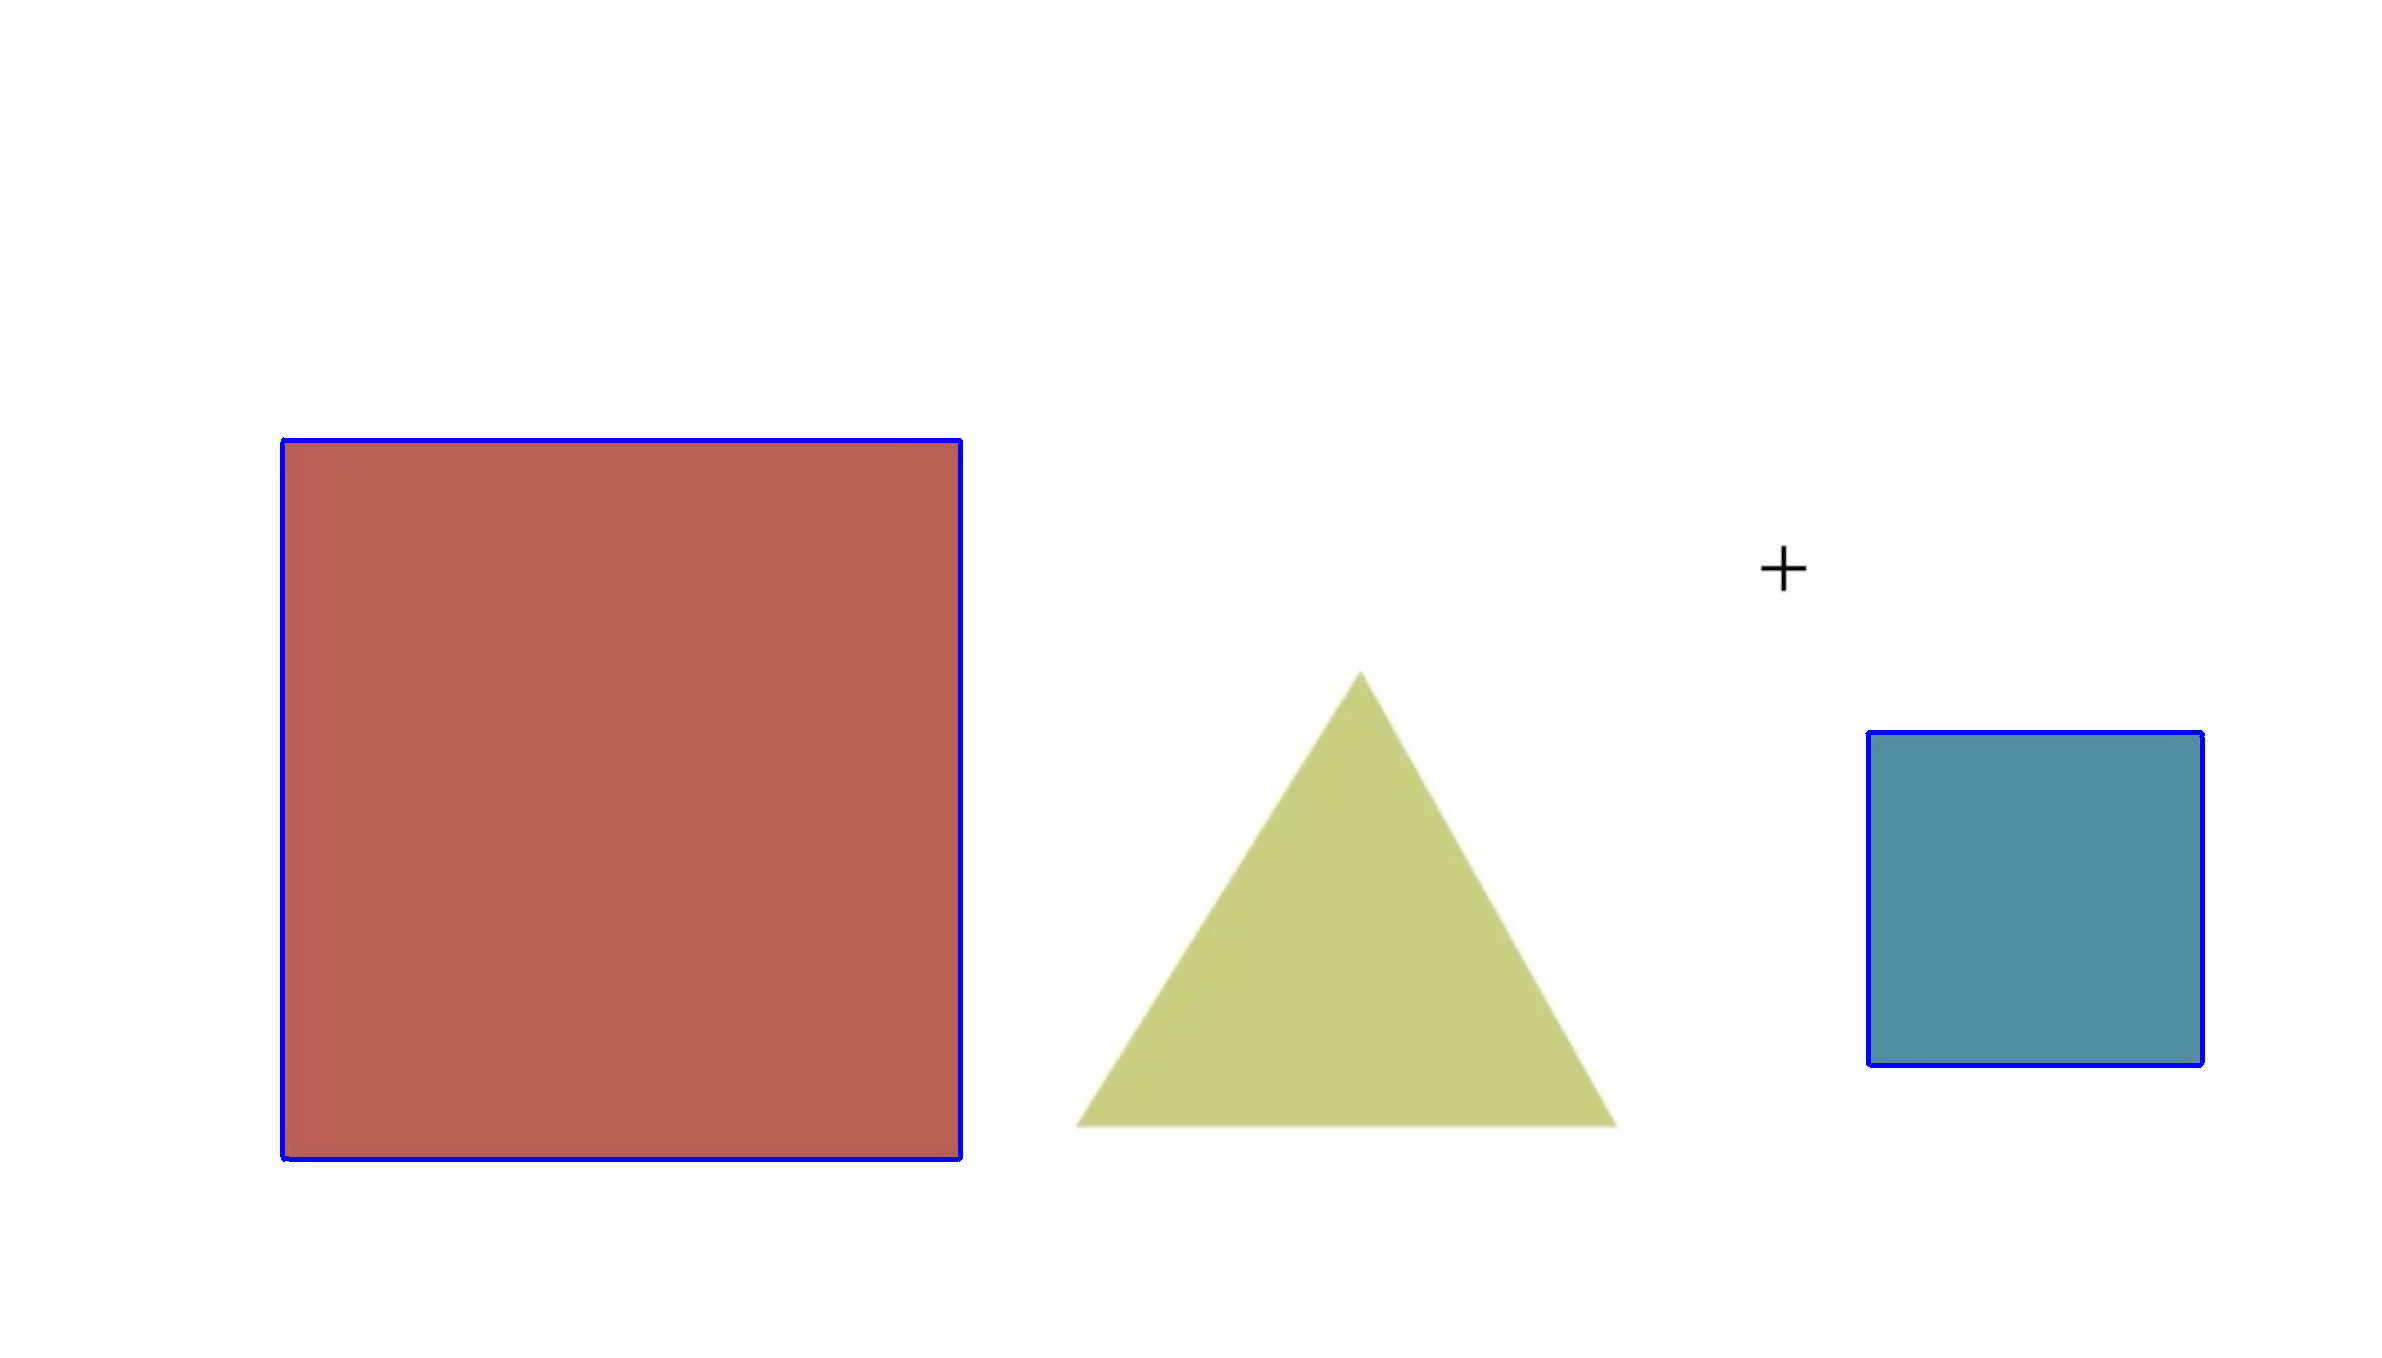

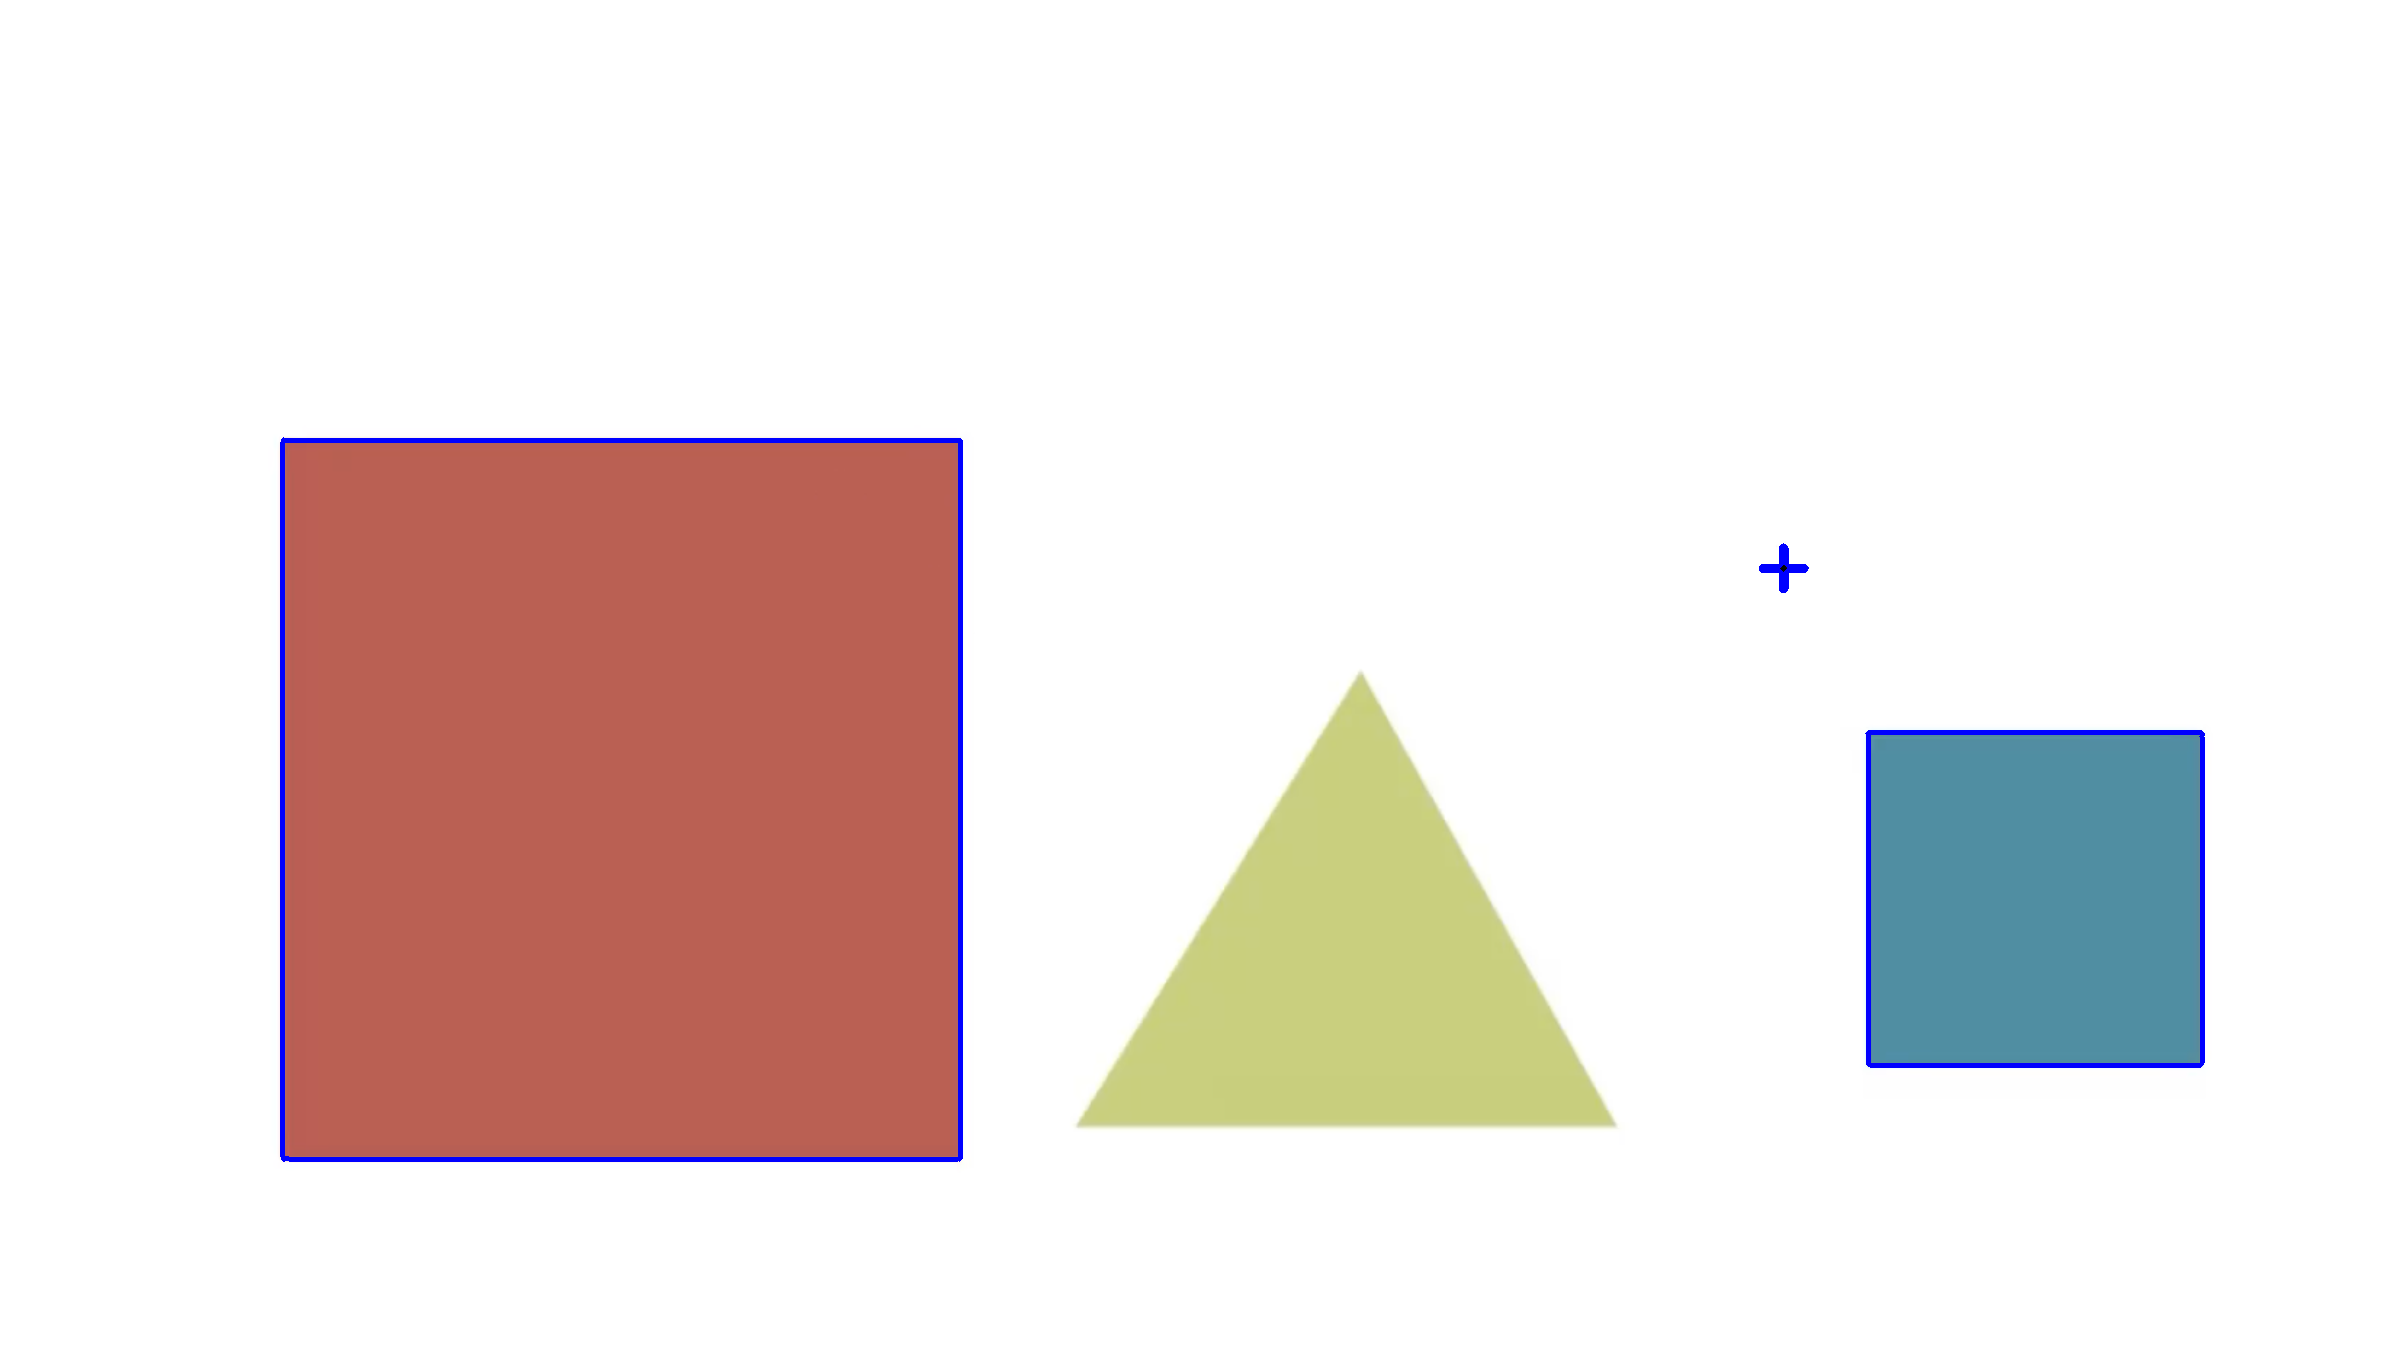

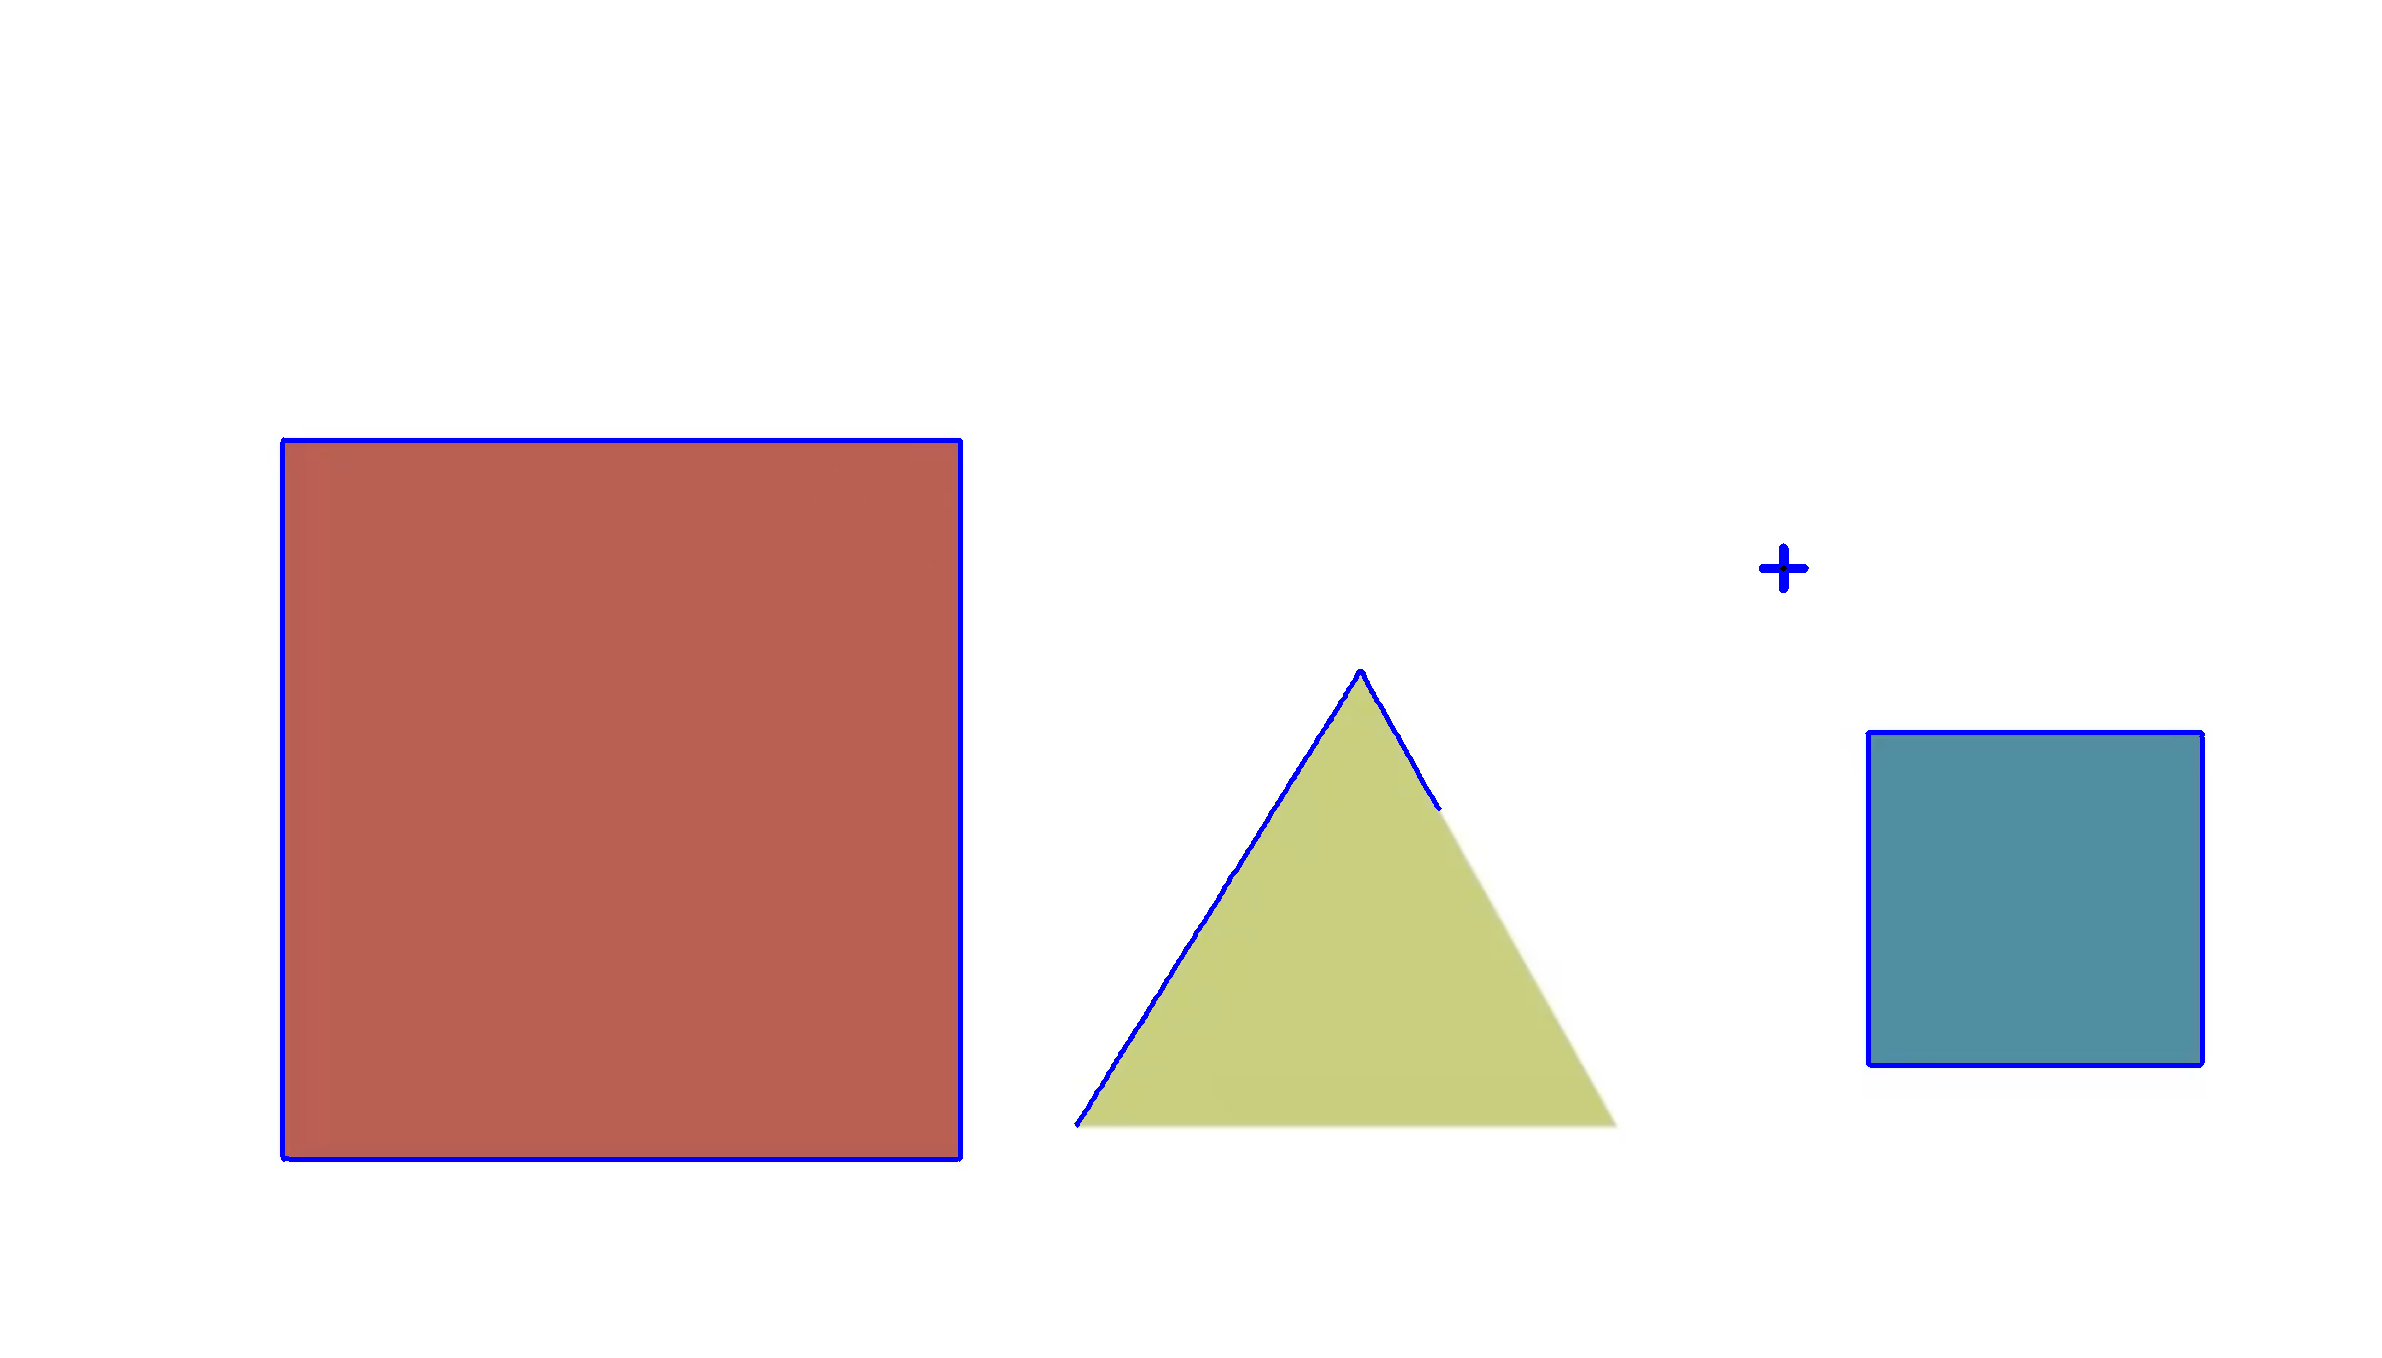

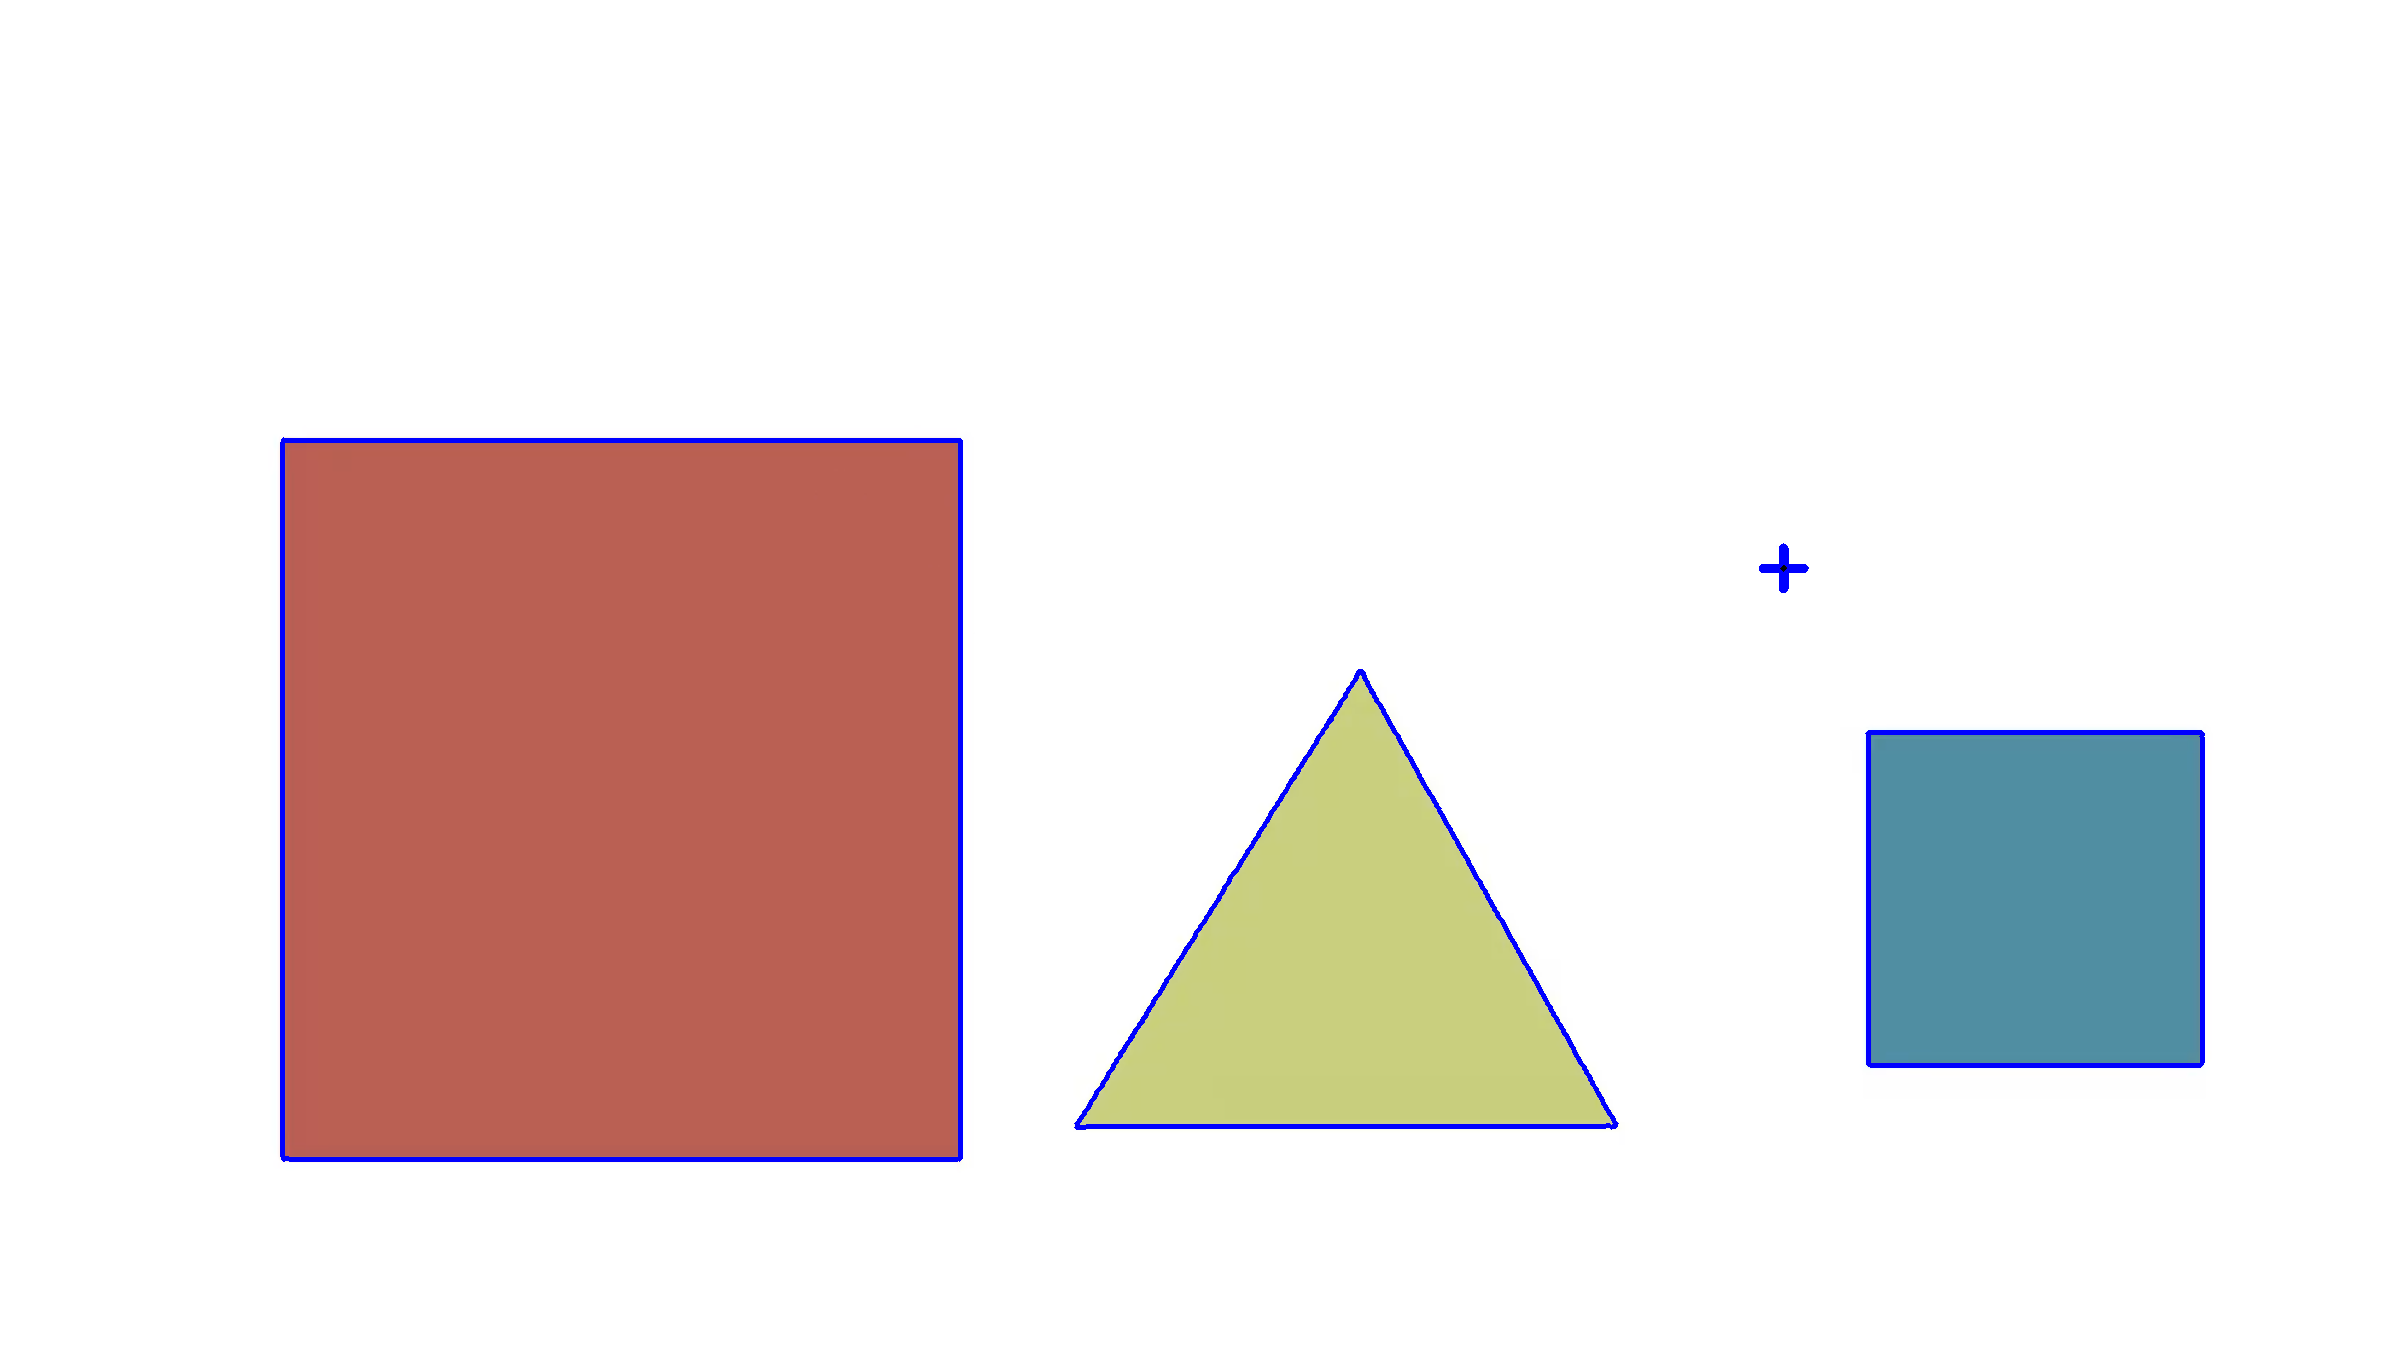

In [ ]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
image = cv2.imread('/content/gdrive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/bunch of shapes.png')
orginal_image = image

# Let's print the areas of the contours before sorting
print ("Contor Areas before sorting")
print (get_contour_areas(contours))

# Sort contours large to small
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]

print ("Contor Areas after sorting")
print (get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for c in sorted_contours:
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)
    cv2.waitKey(0)
    cv2_imshow(orginal_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from google.colab.patches import cv2_imshow

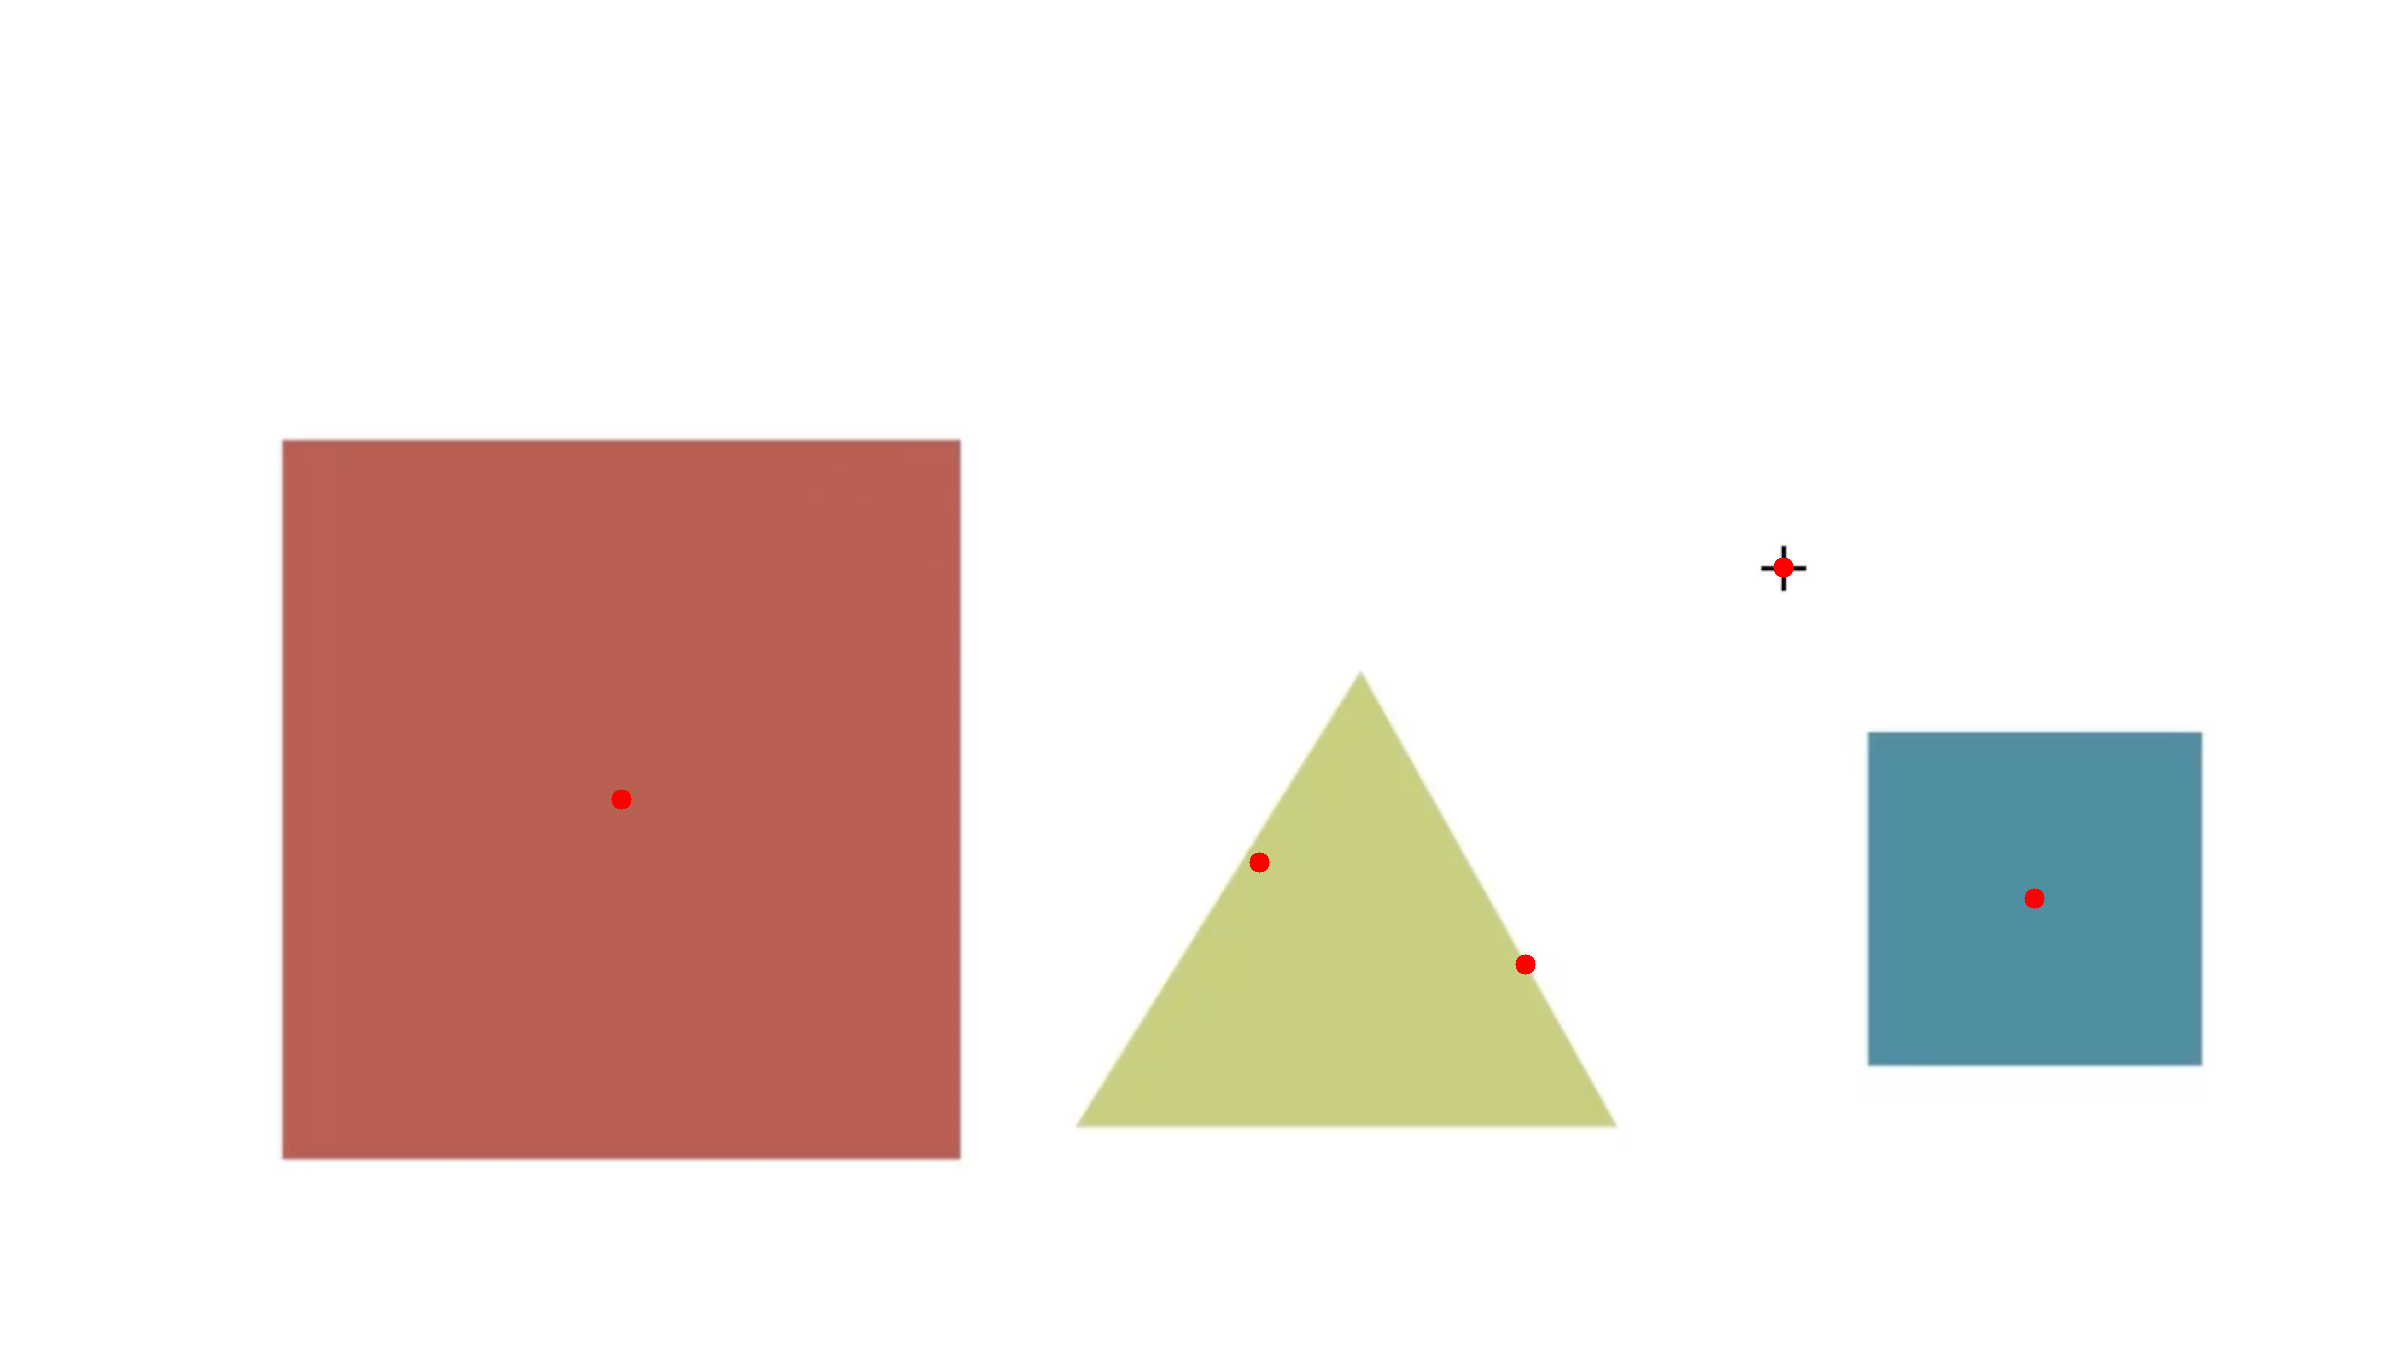

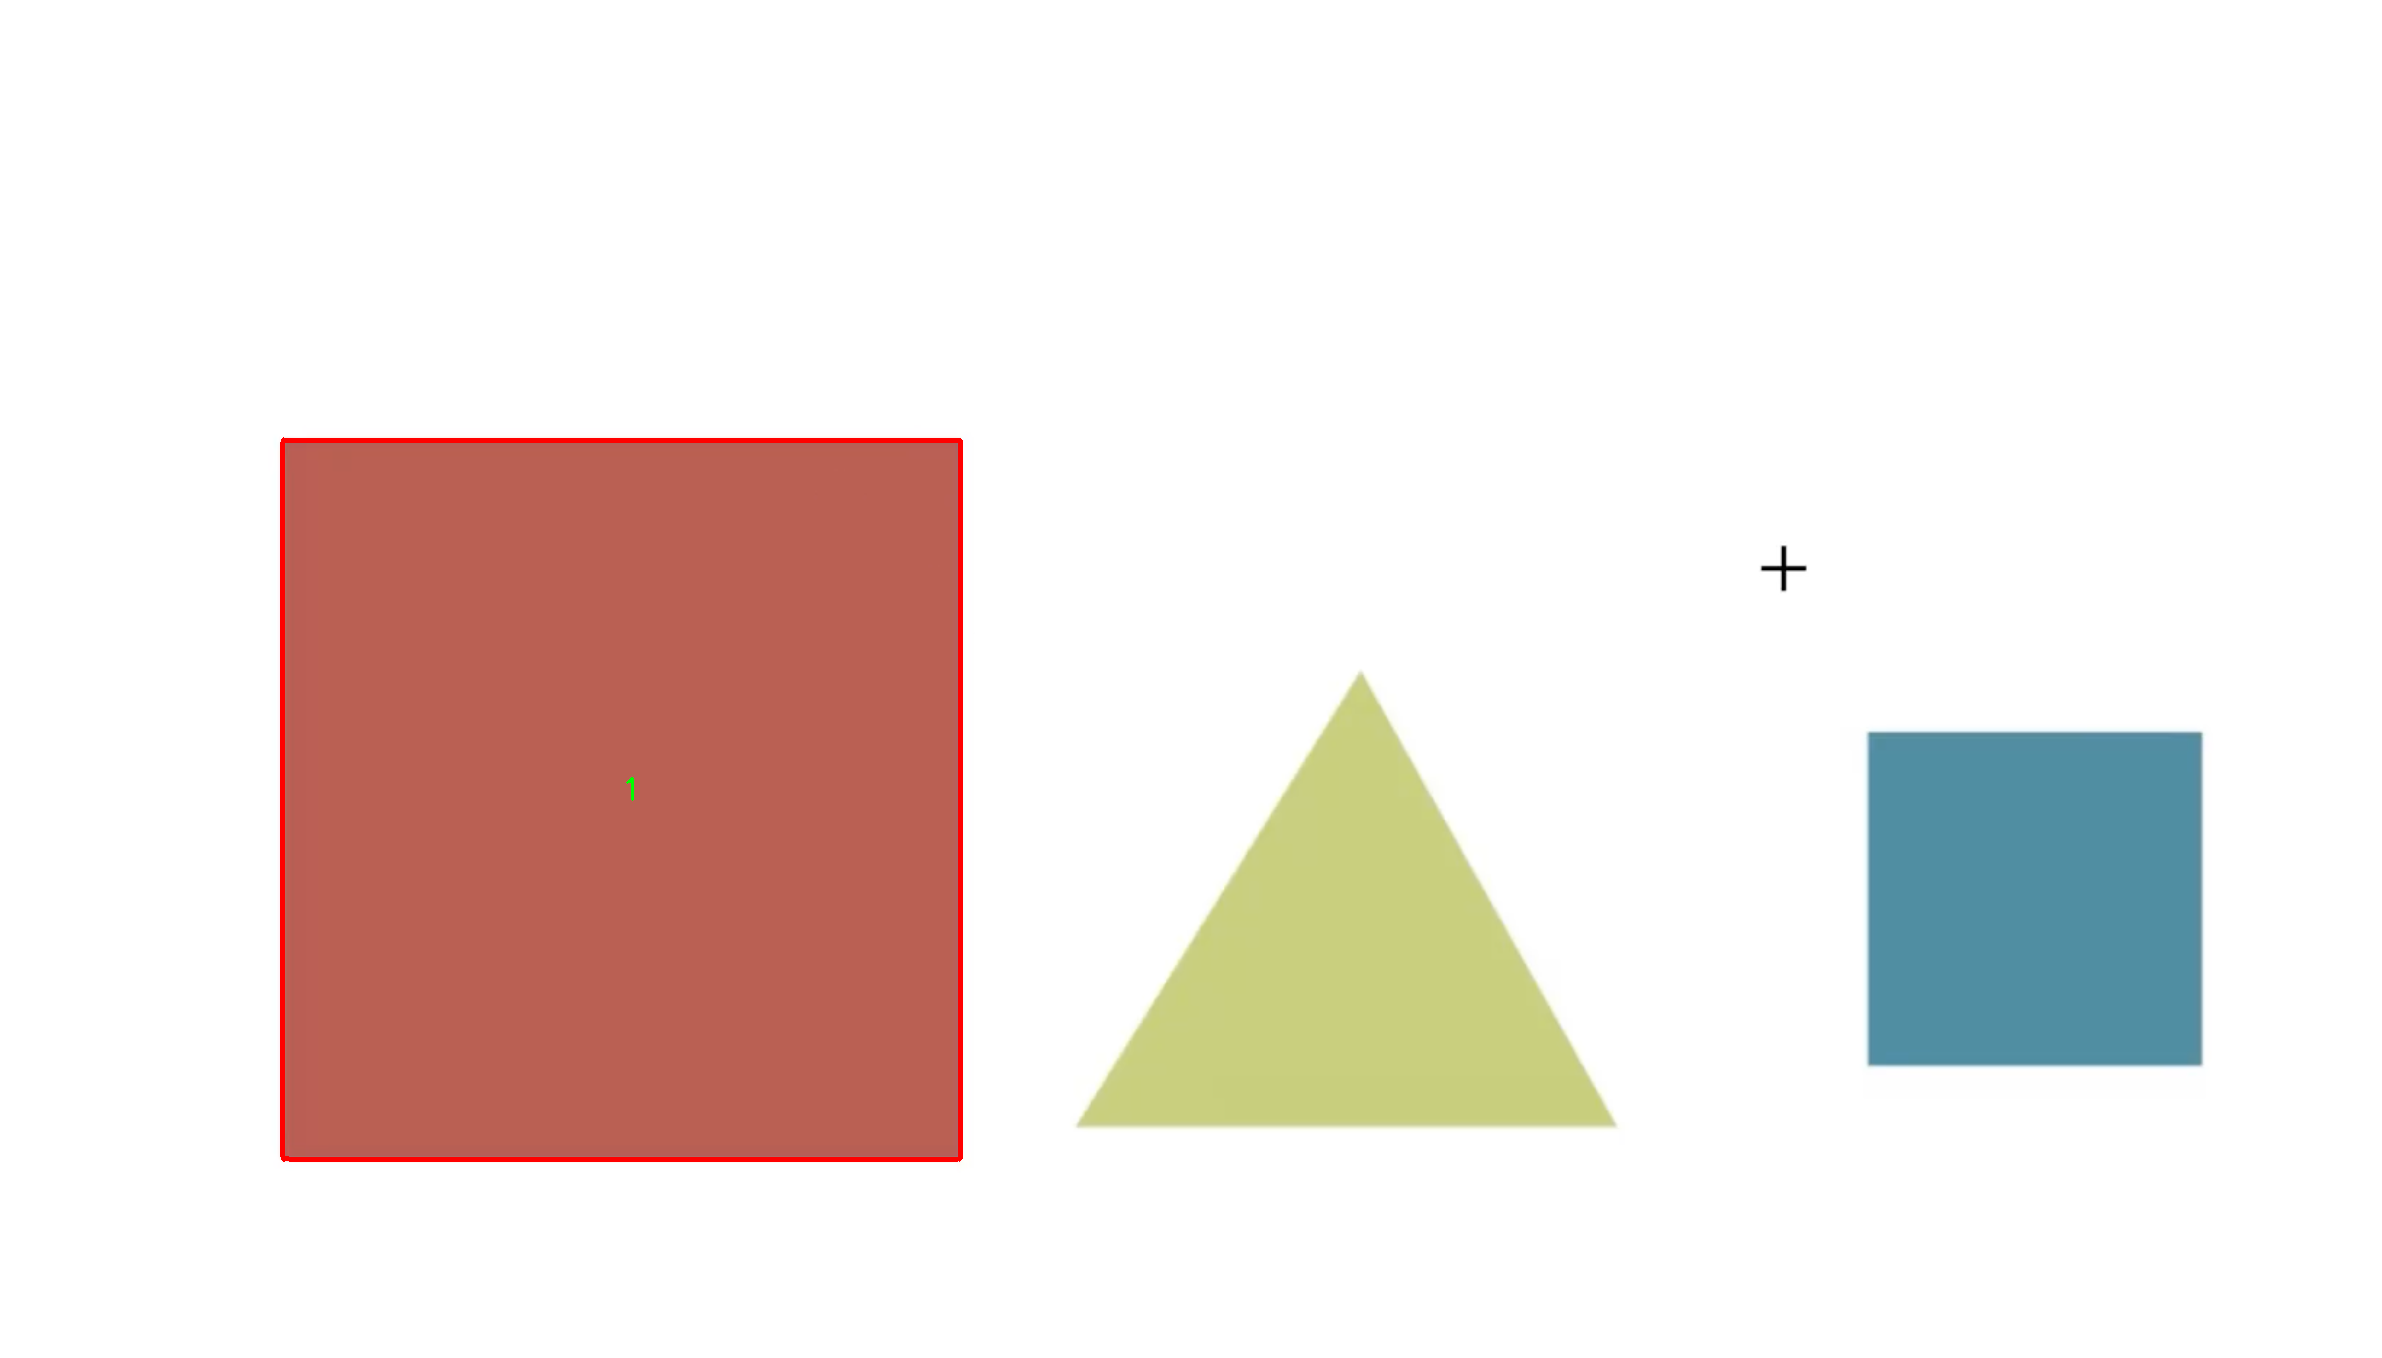

output_shape_number_1.jpg


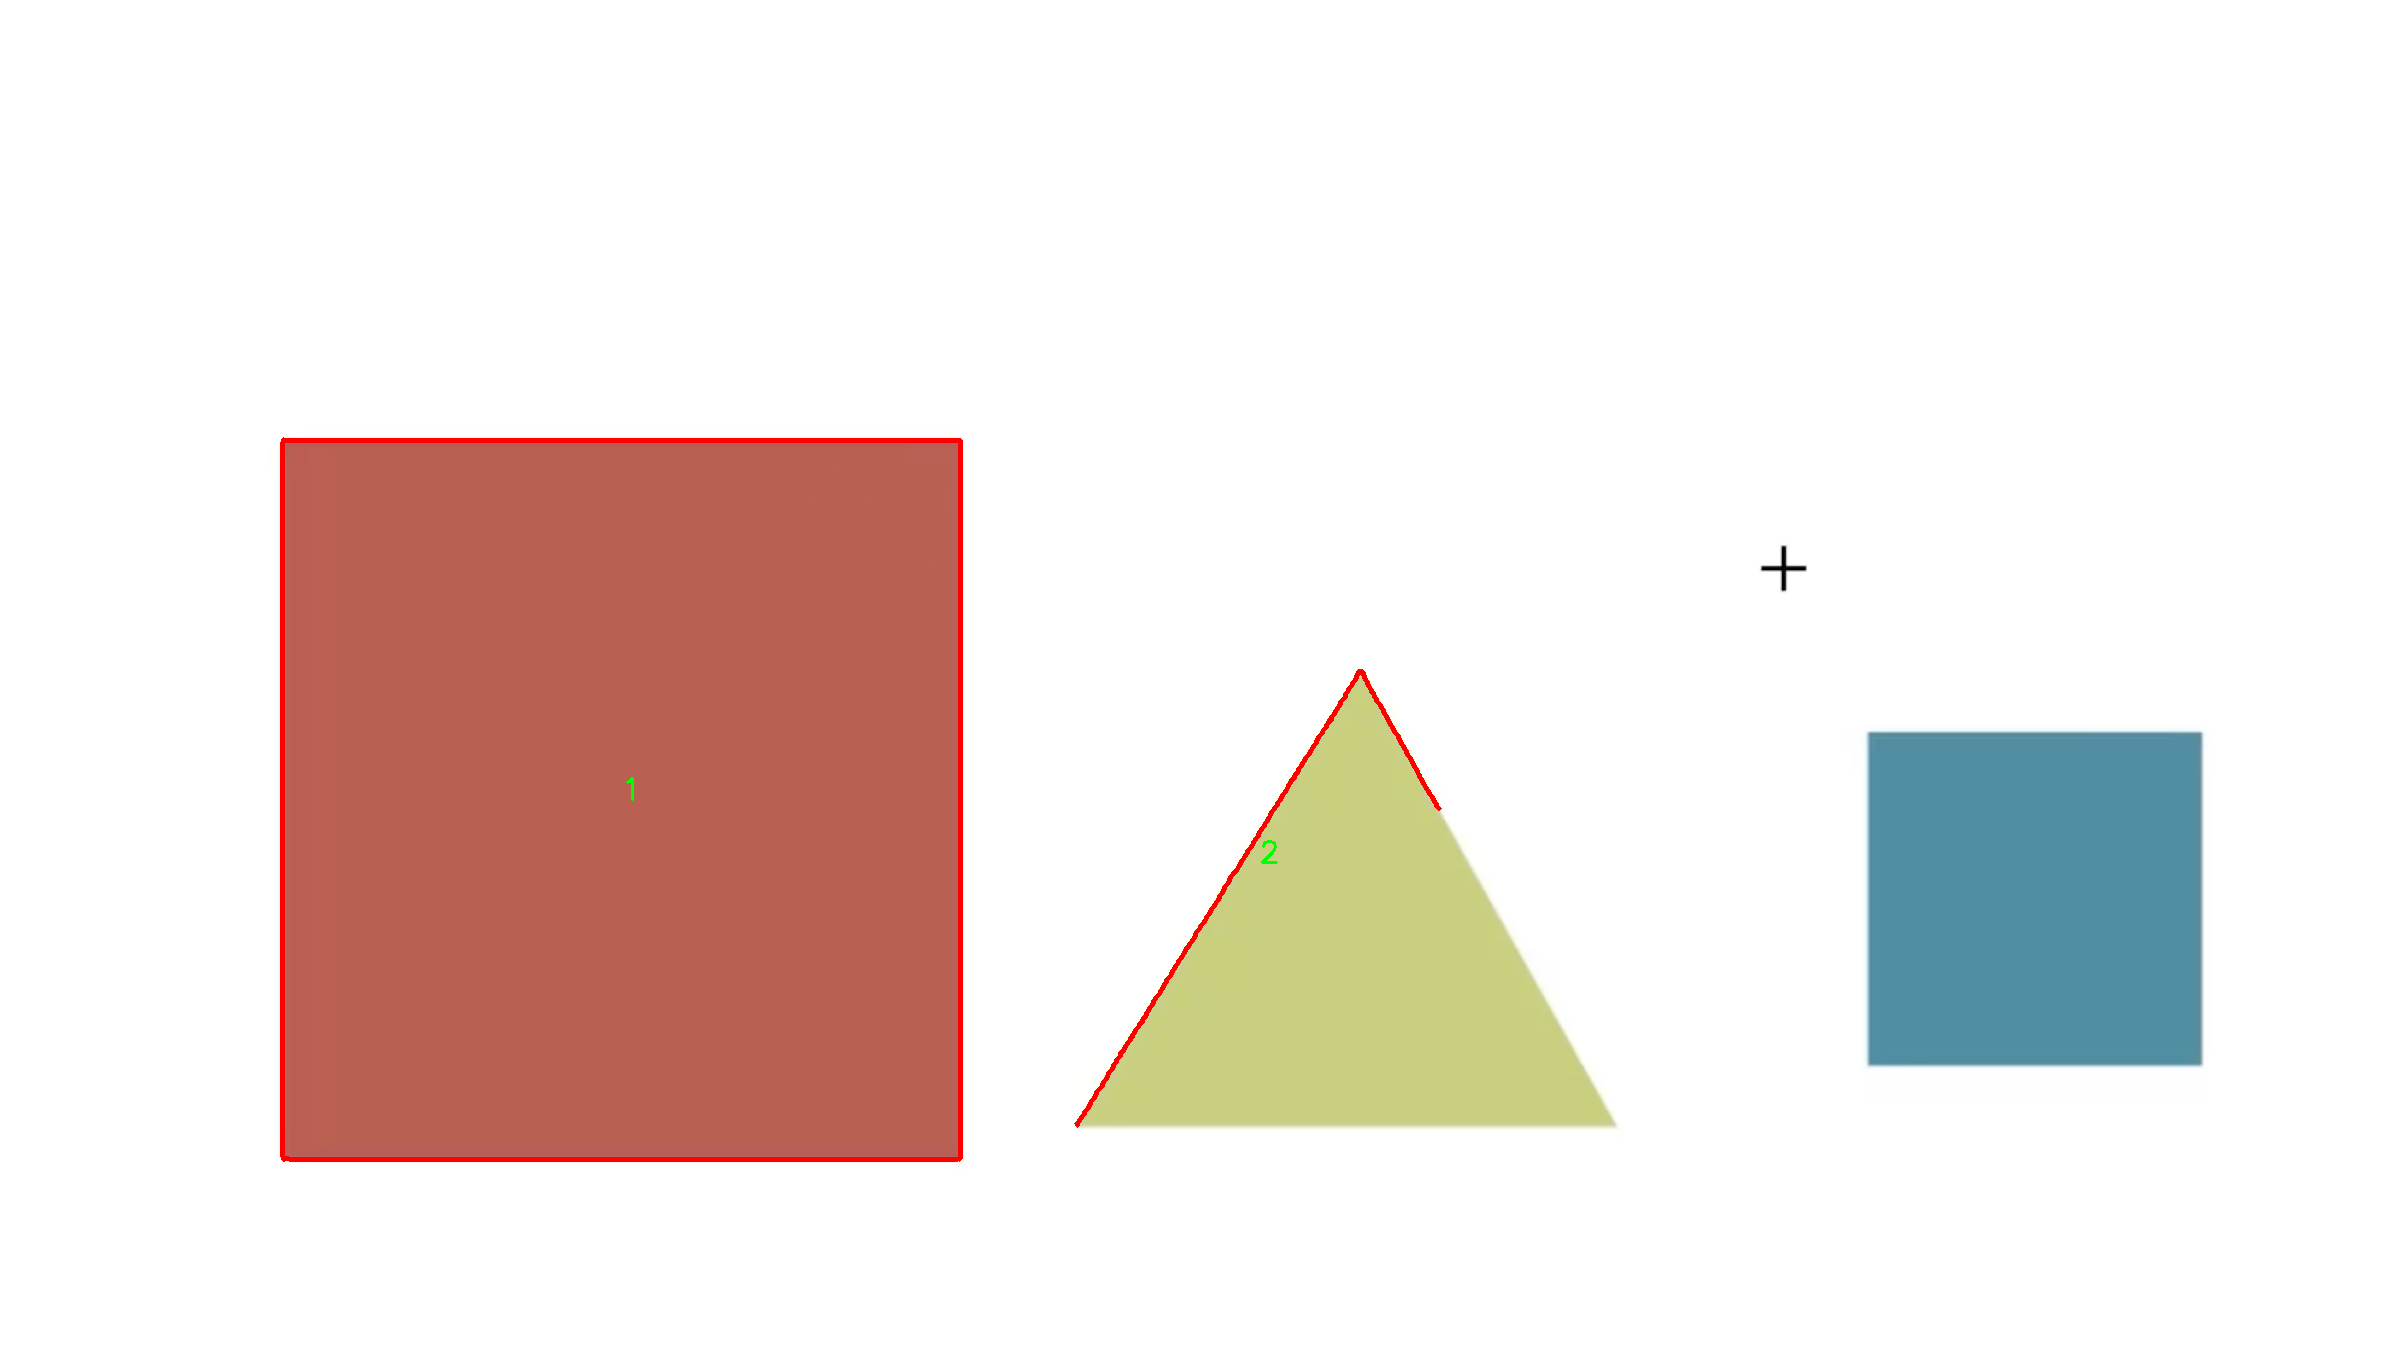

output_shape_number_2.jpg


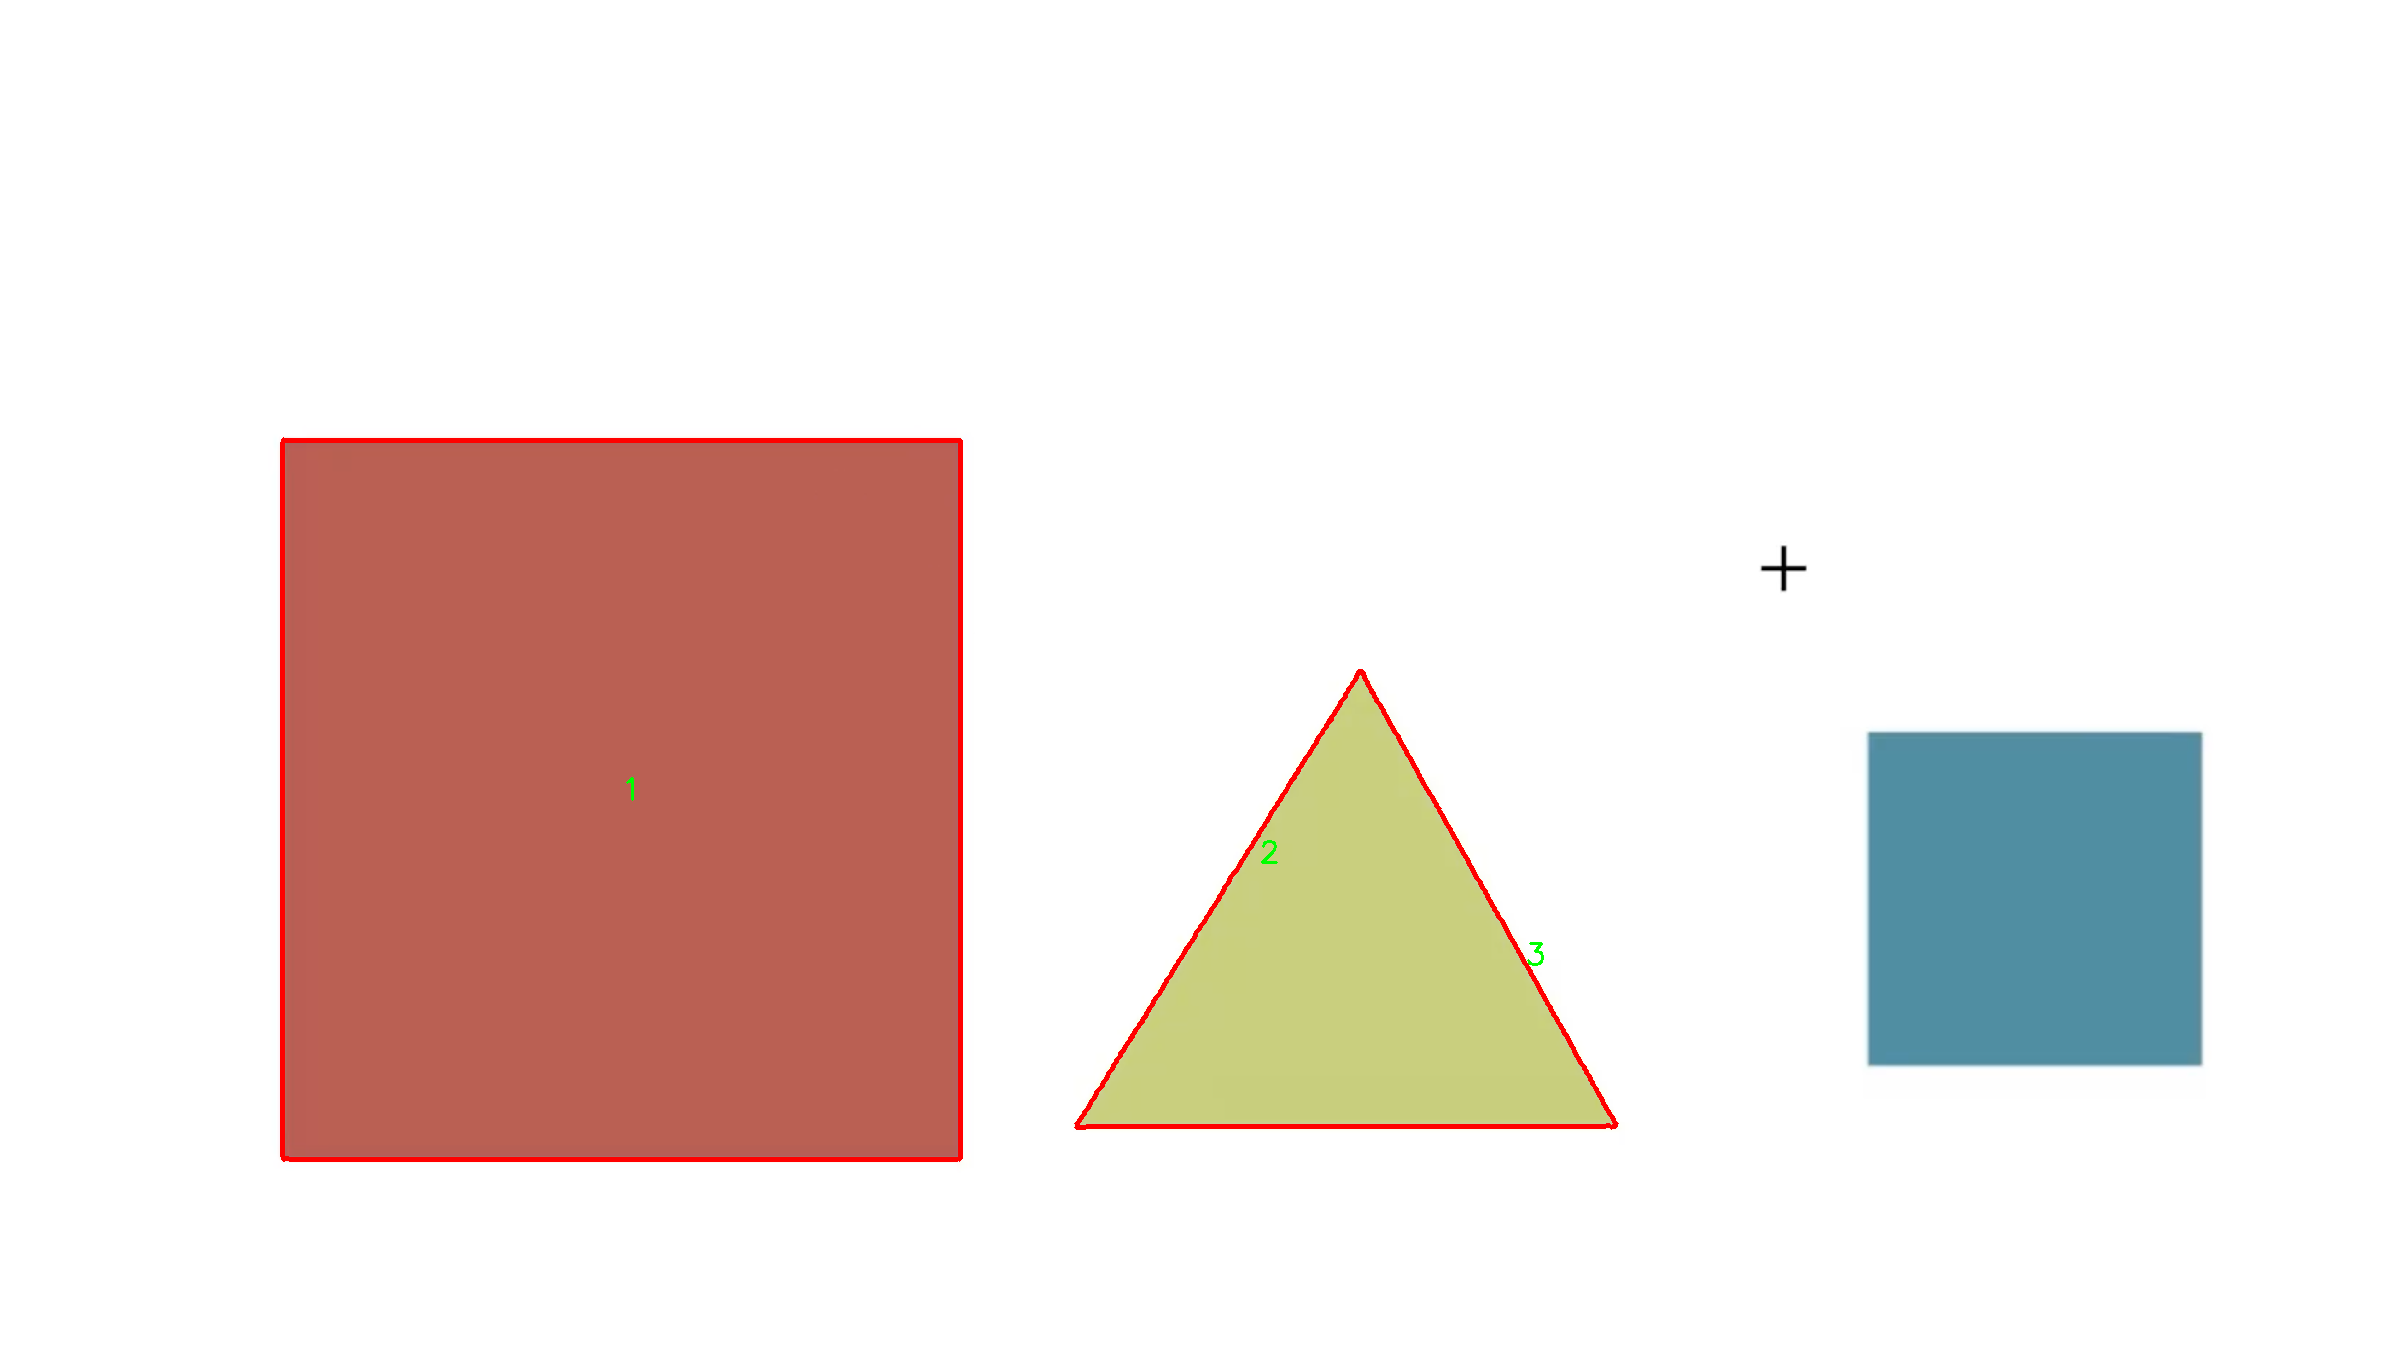

output_shape_number_3.jpg


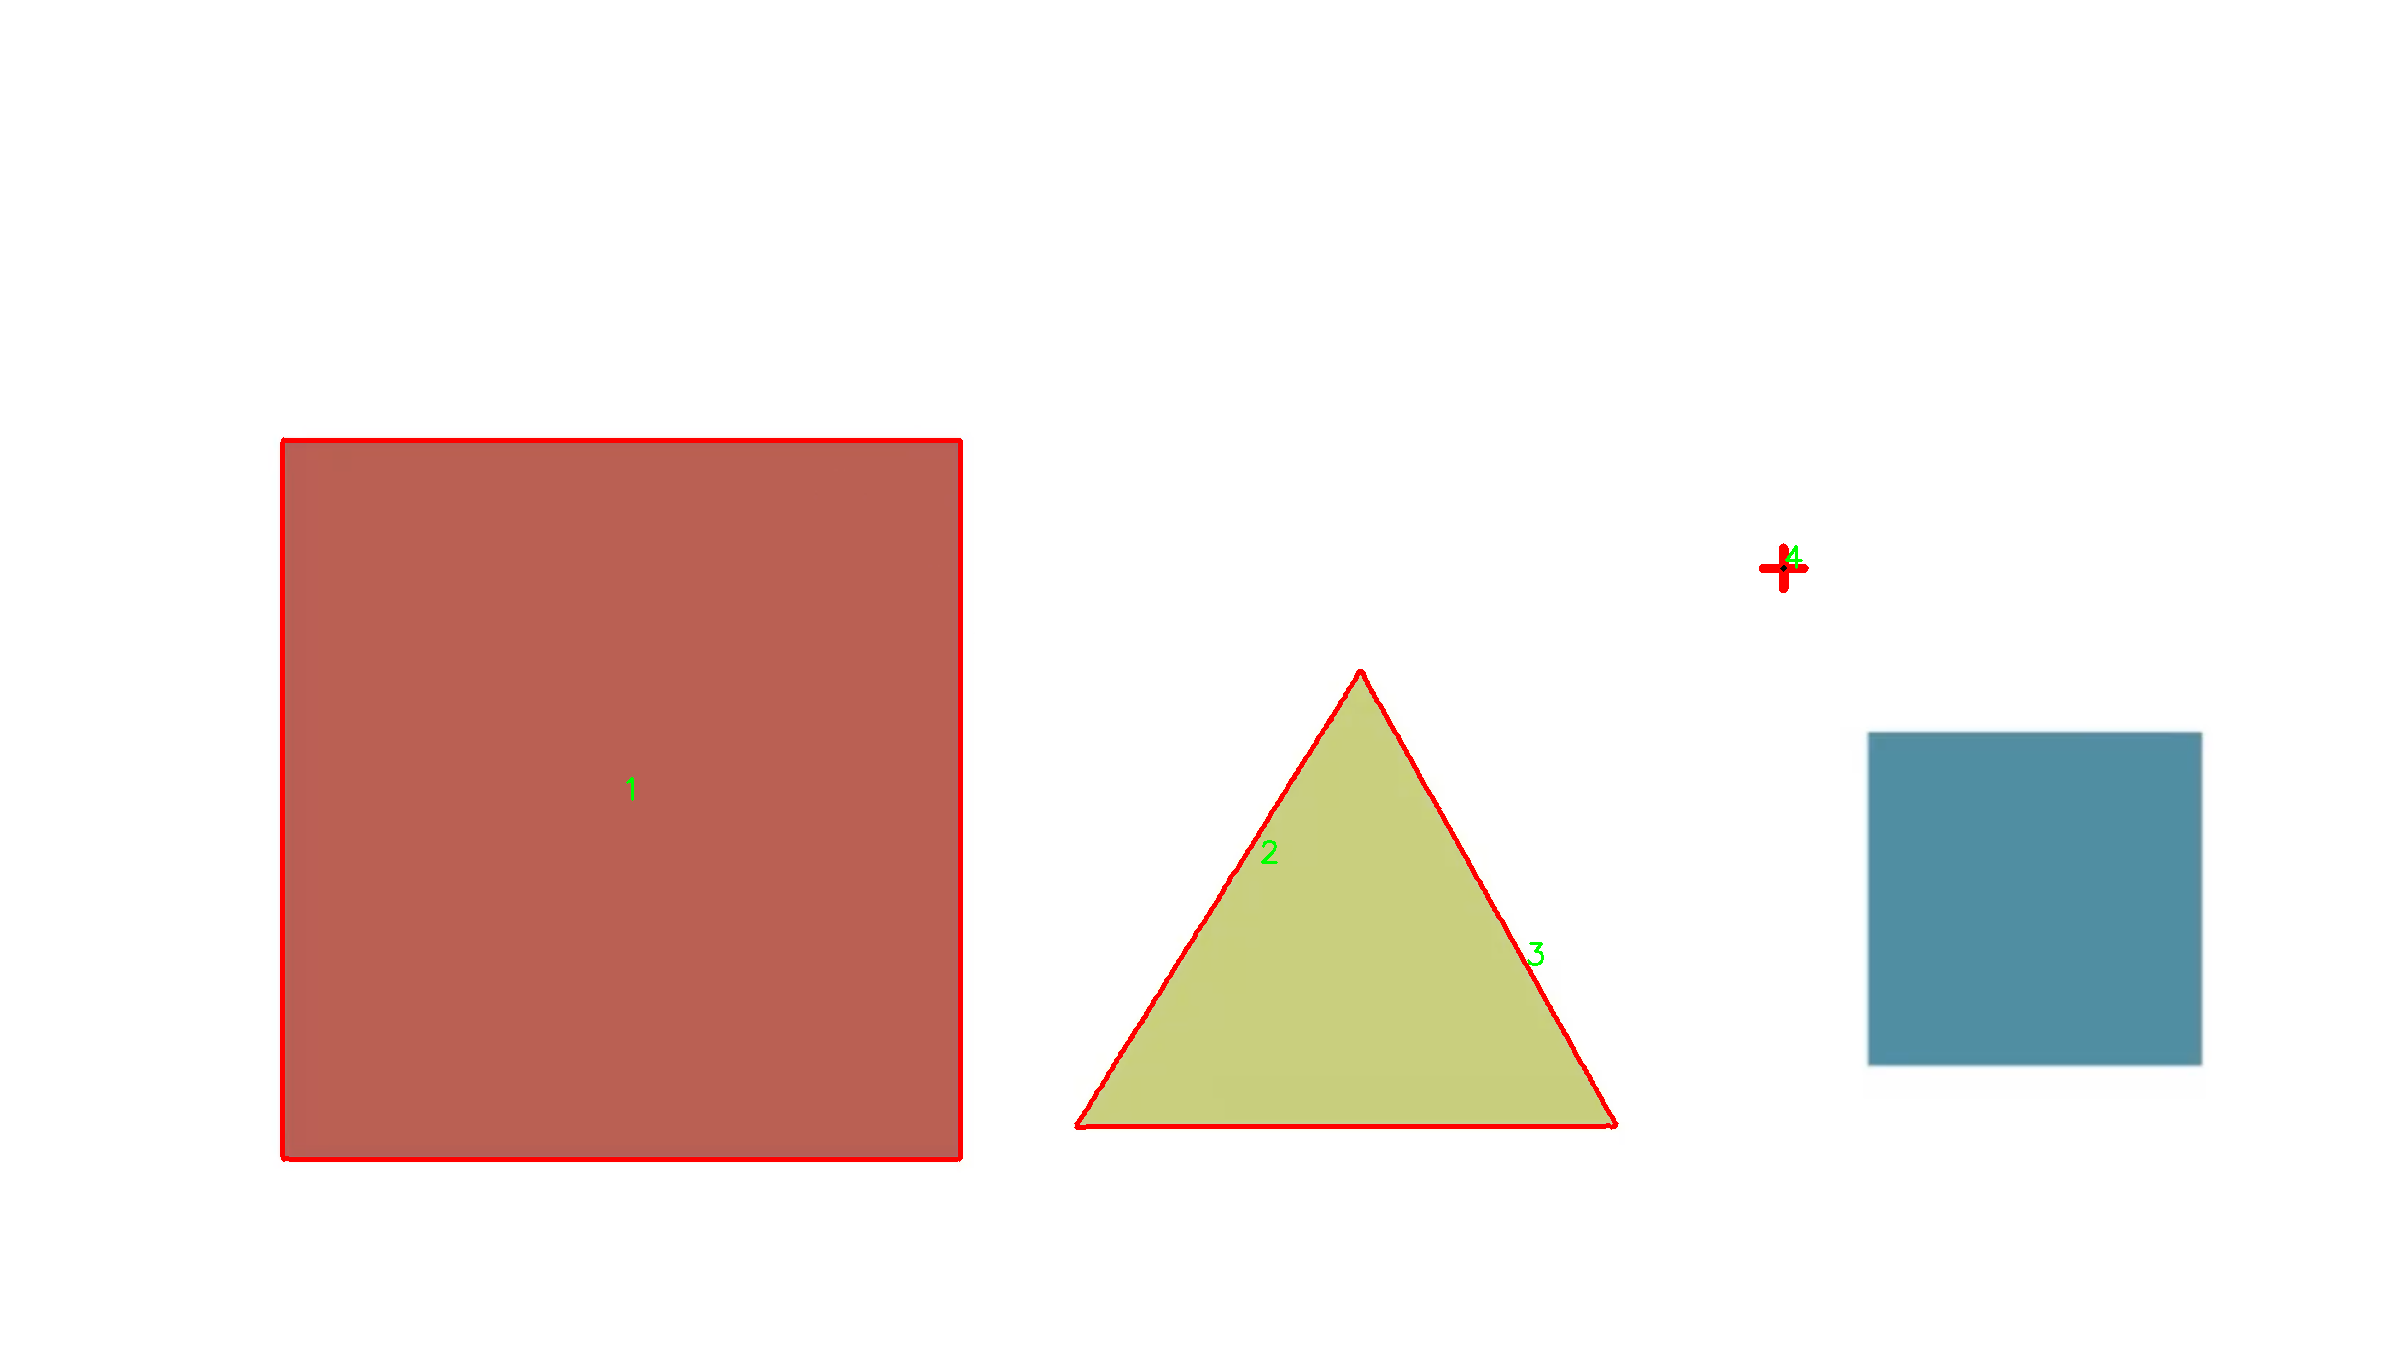

output_shape_number_4.jpg


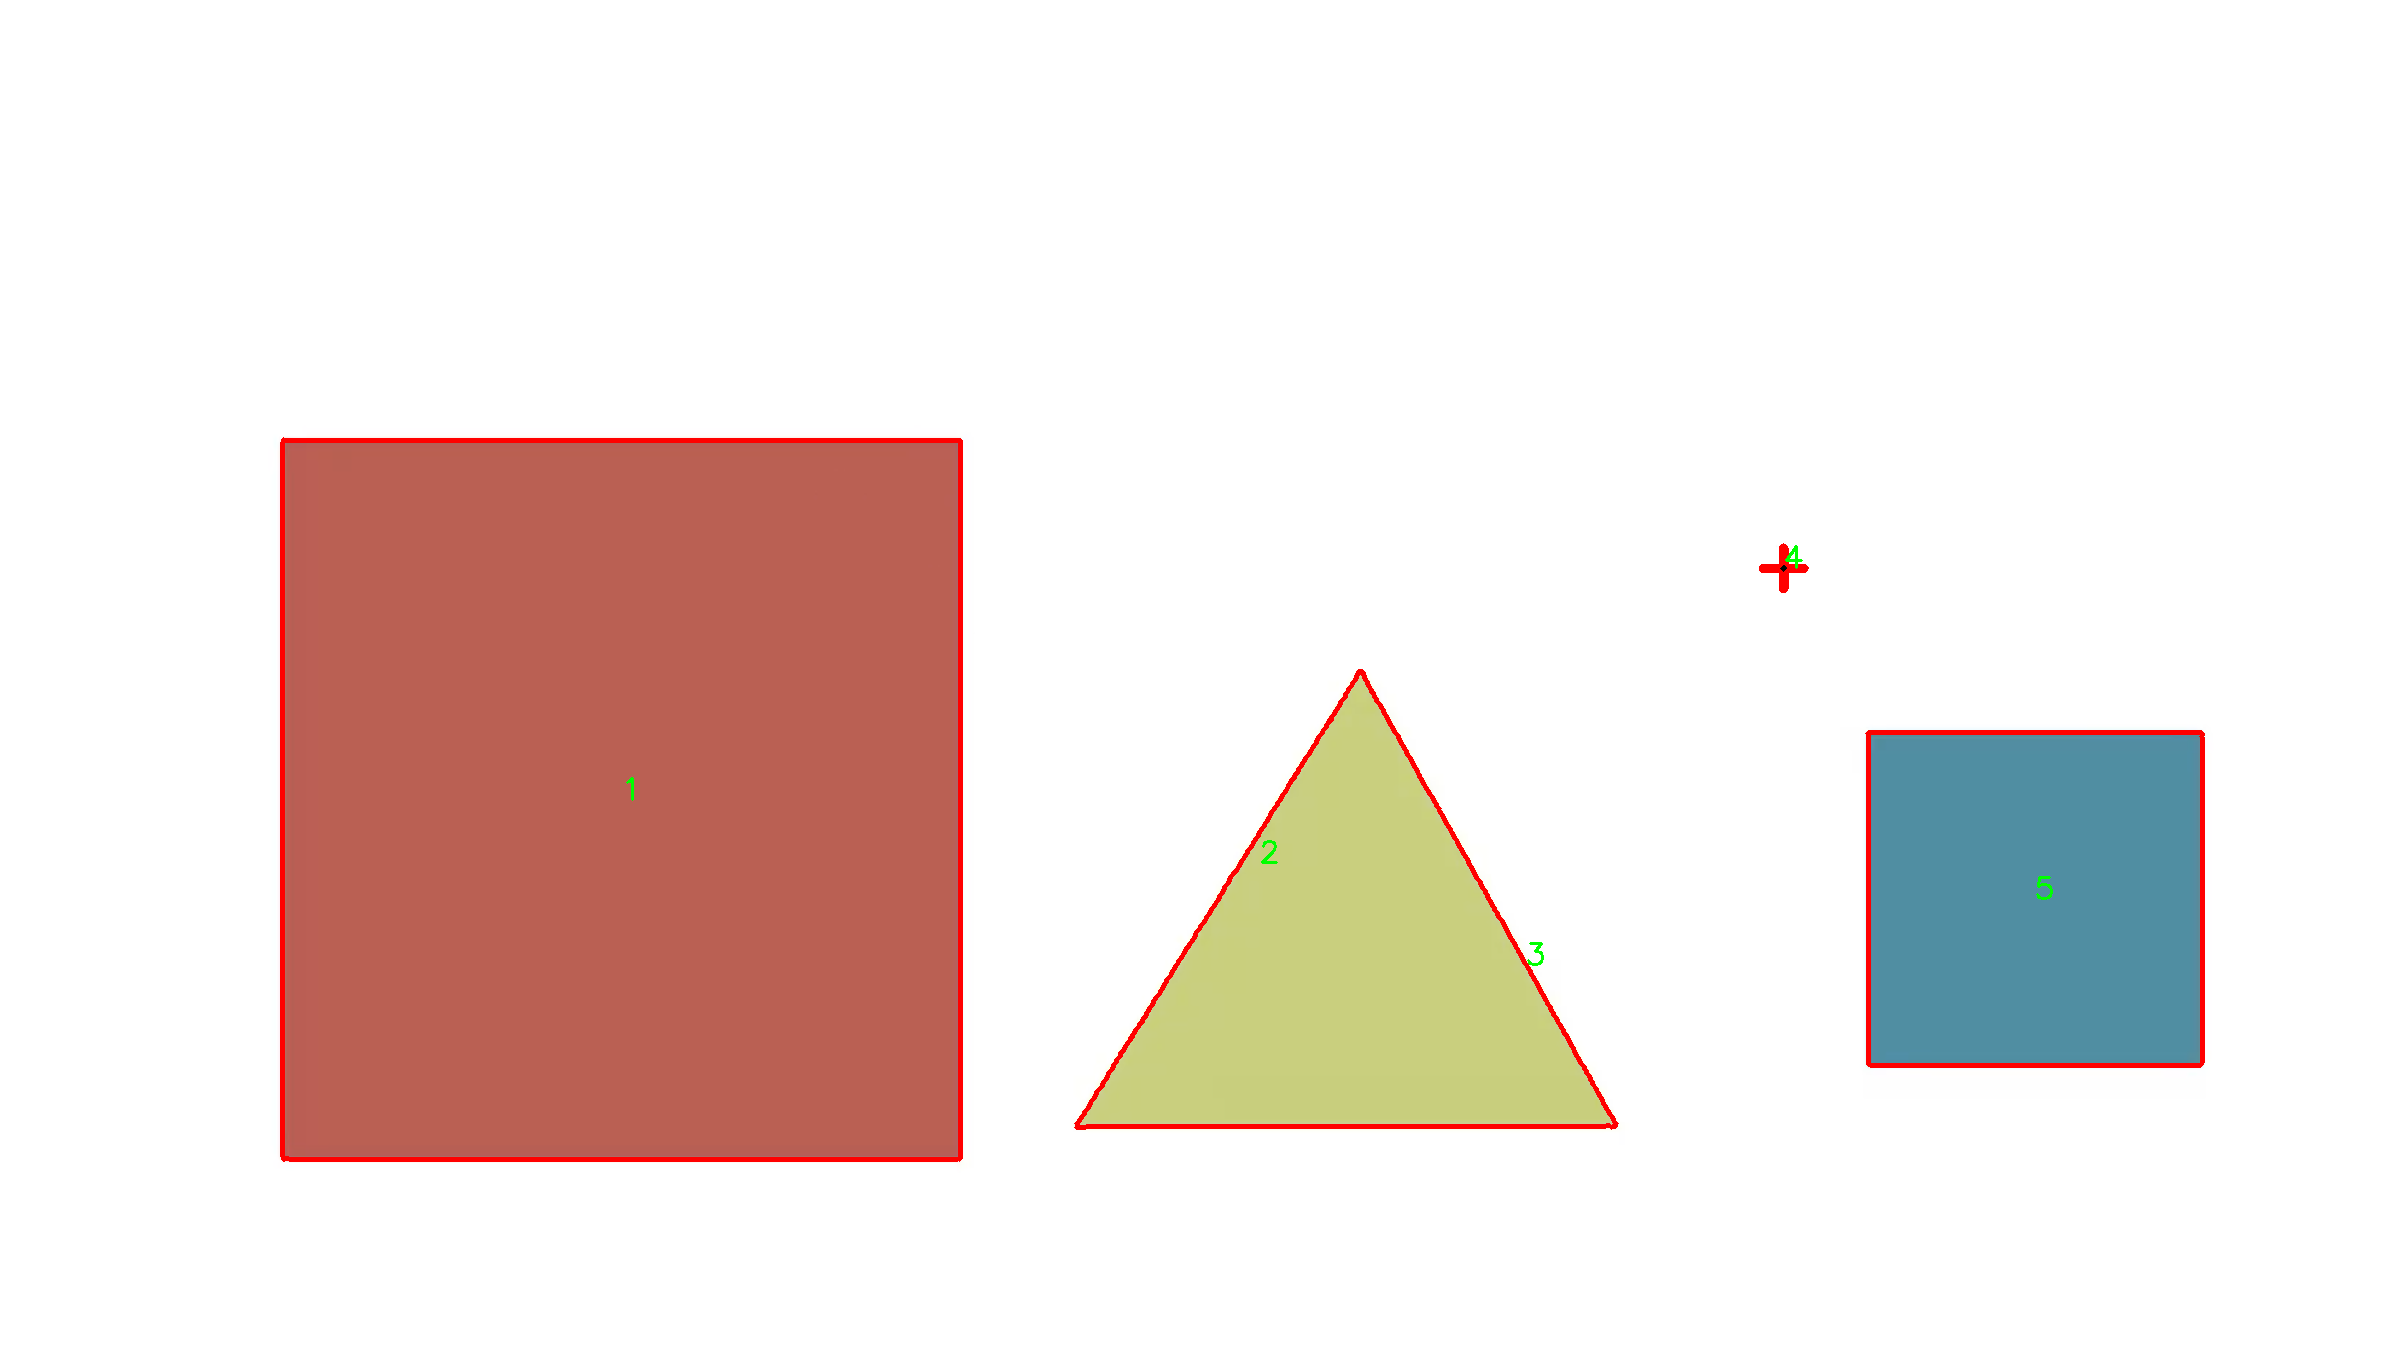

output_shape_number_5.jpg


In [ ]:
import cv2
import numpy as np

# Functions we'll use for sorting by position

def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

    
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
 
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image


# Load our image
image = cv2.imread('/content/gdrive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/bunch of shapes.png')
orginal_image = image.copy()


# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
cv2_imshow(image)
cv2.waitKey(0)

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)


# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(orginal_image)
    cv2.waitKey(0)
    (x, y, w, h) = cv2.boundingRect(c)  
    
    # Let's now crop each contour and save these images
    cropped_contour = orginal_image[y:y + h, x:x + w]
    image_name = "output_shape_number_" + str(i+1) + ".jpg"
    print (image_name)
    cv2.imwrite(image_name, cropped_contour)
    
cv2.destroyAllWindows()




# 4.4 Matching contours shapes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np

# Load the shape template or reference image
template = cv2.imread('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/4STARS.png',0)
cv2_imshow('Template')
cv2.waitKey()

# Load the target image with the shapes we're trying to match
target = cv2.imread('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/4STARS.png')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
cv2_imshow('Output', target)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: ignored

# 4.5 Mini Project 2 - Identifiy Contours by Shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow

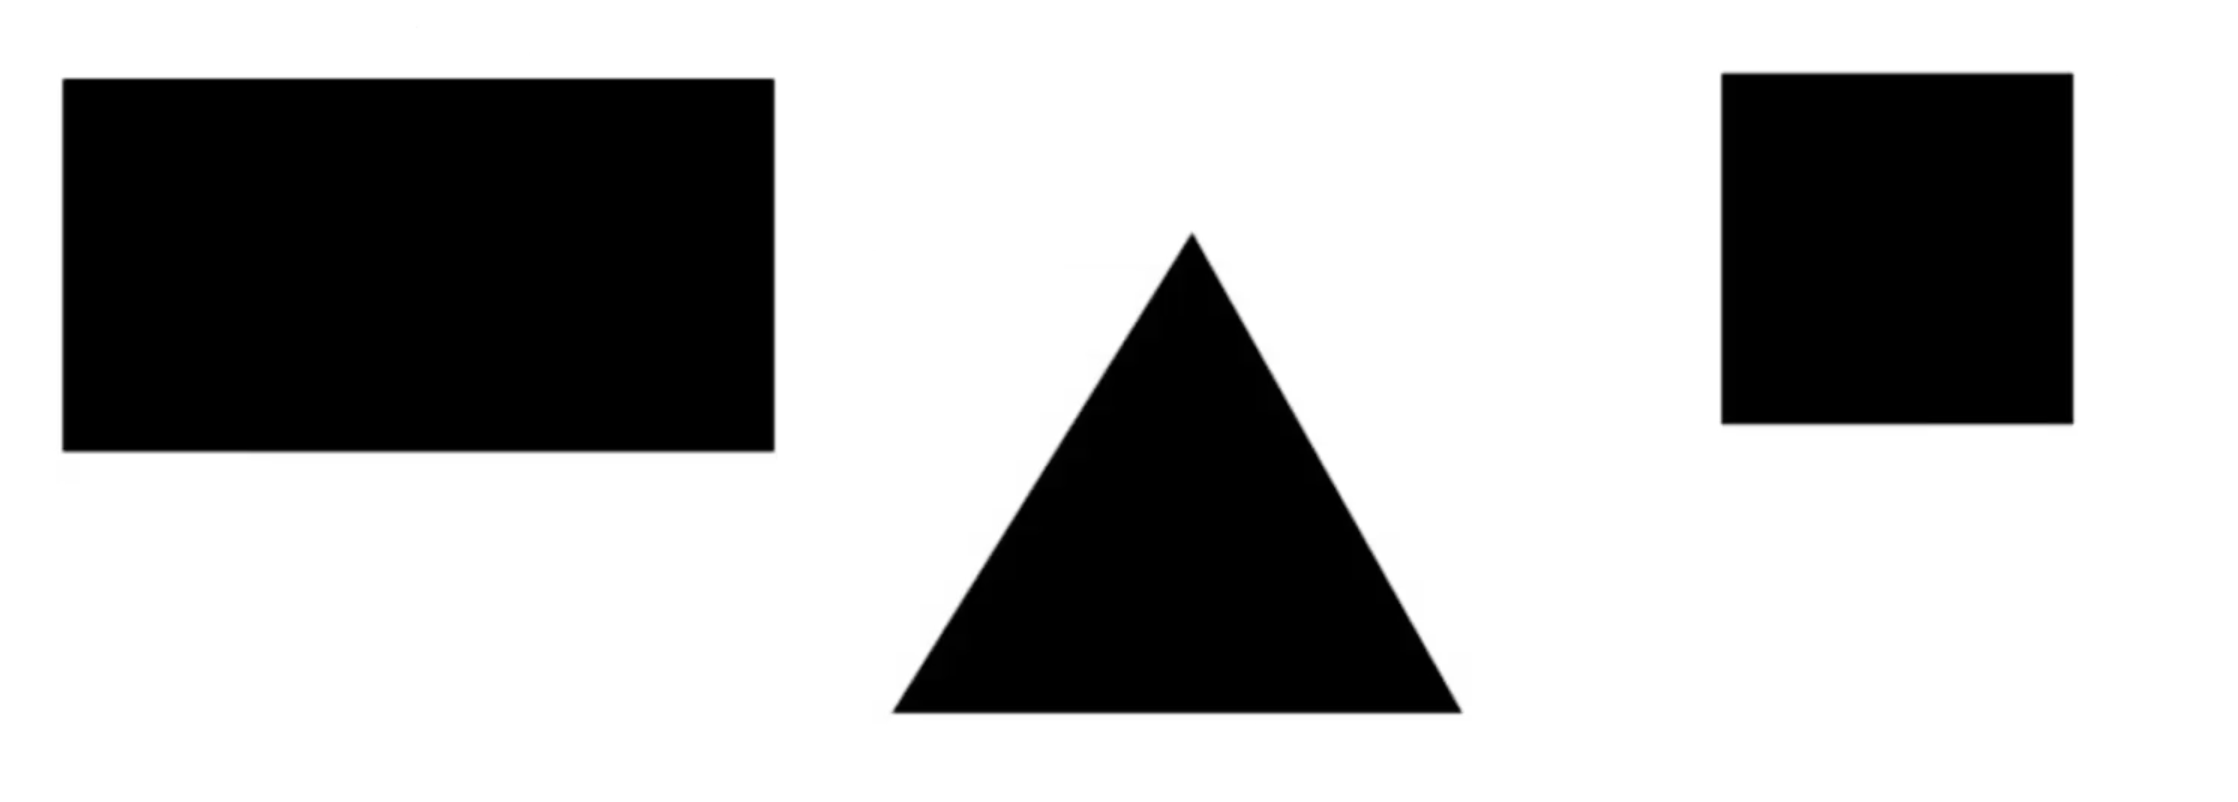

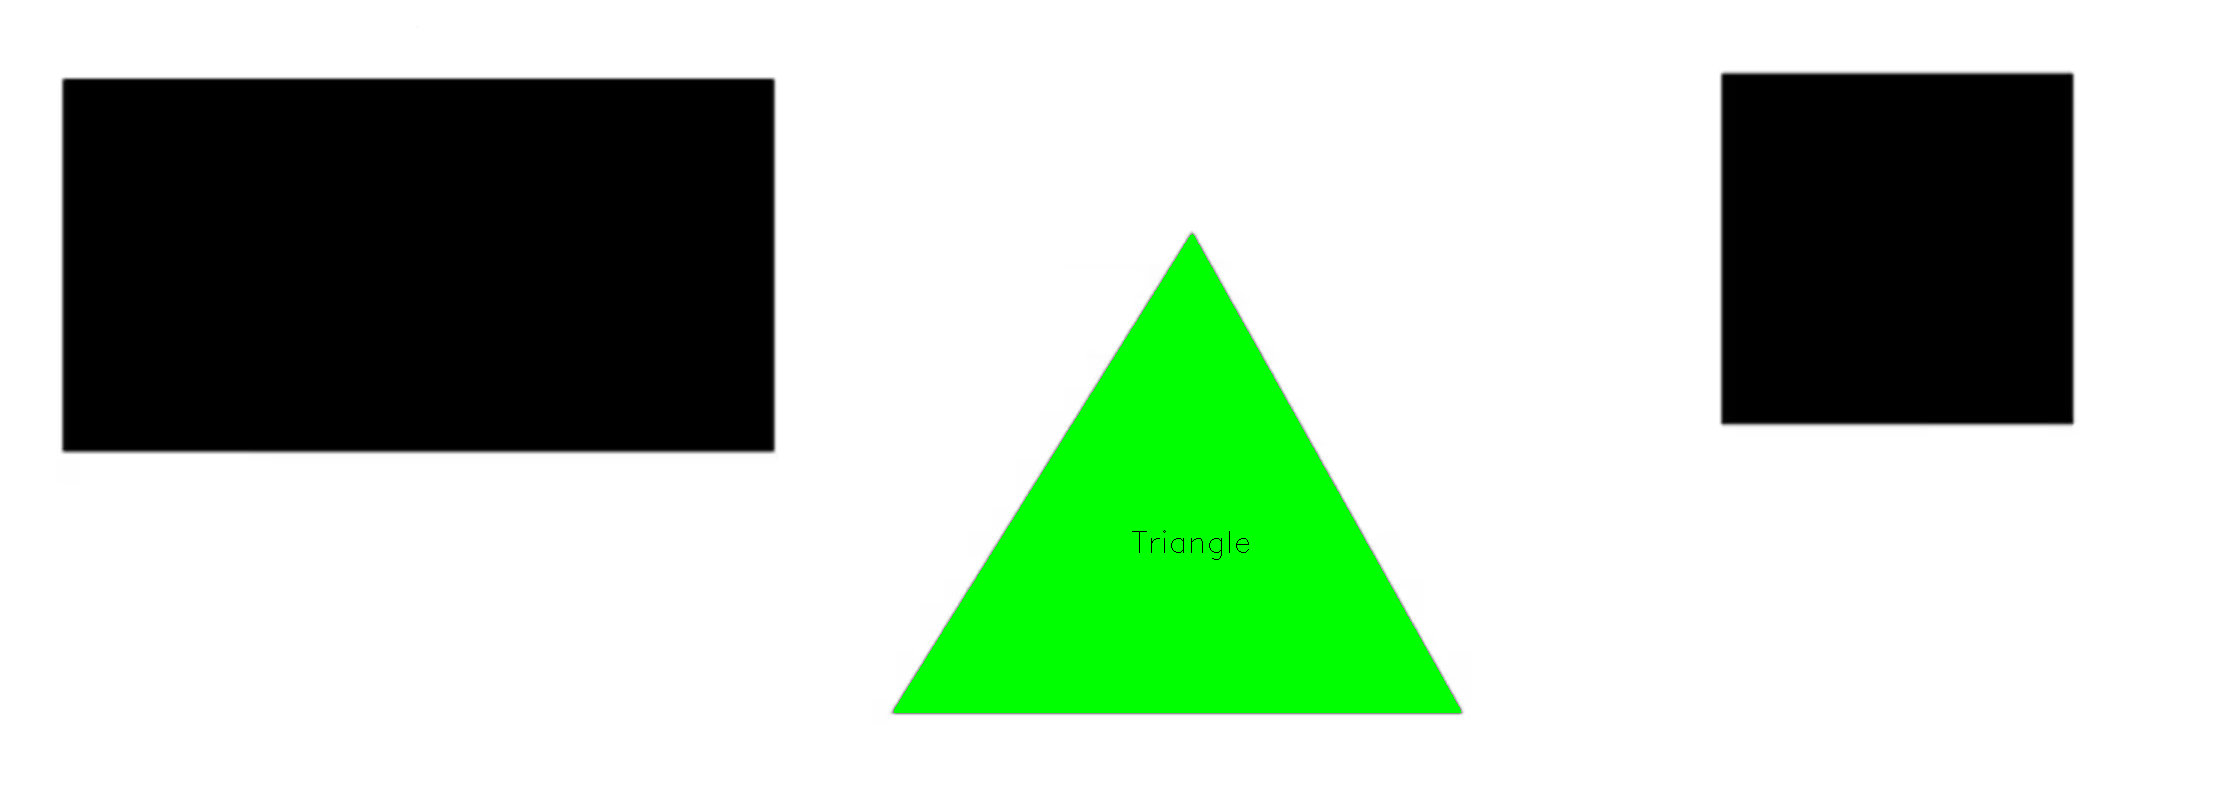

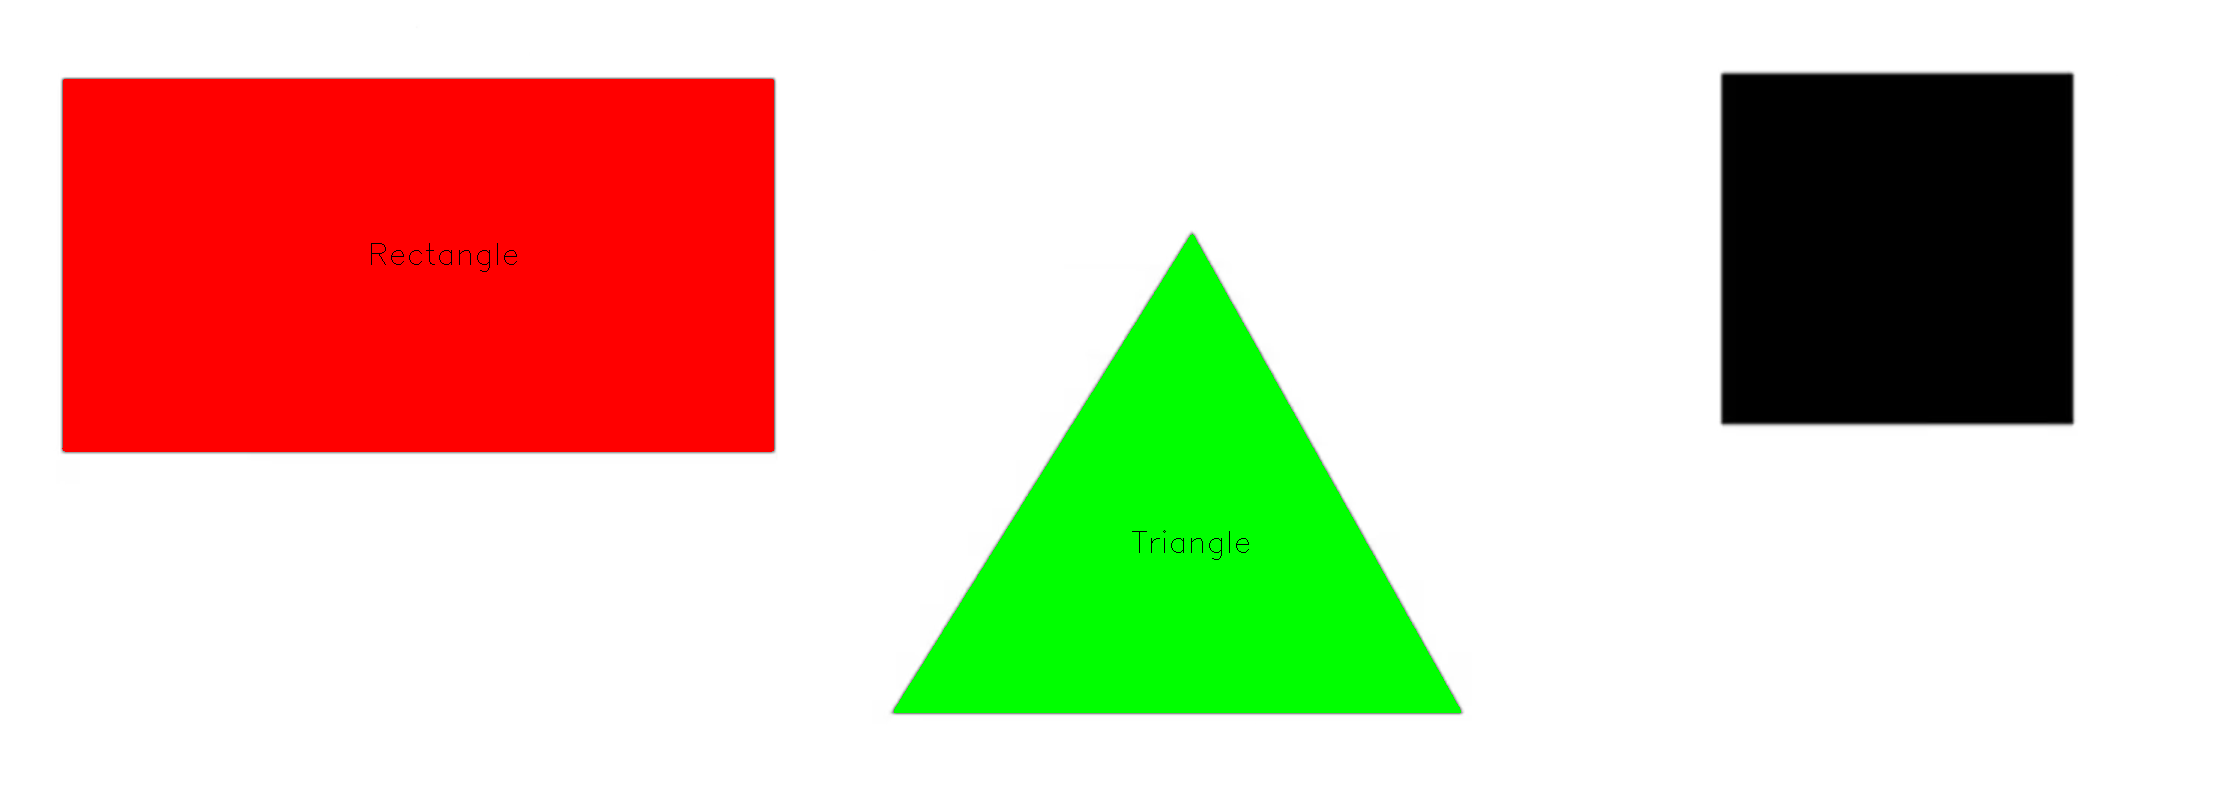

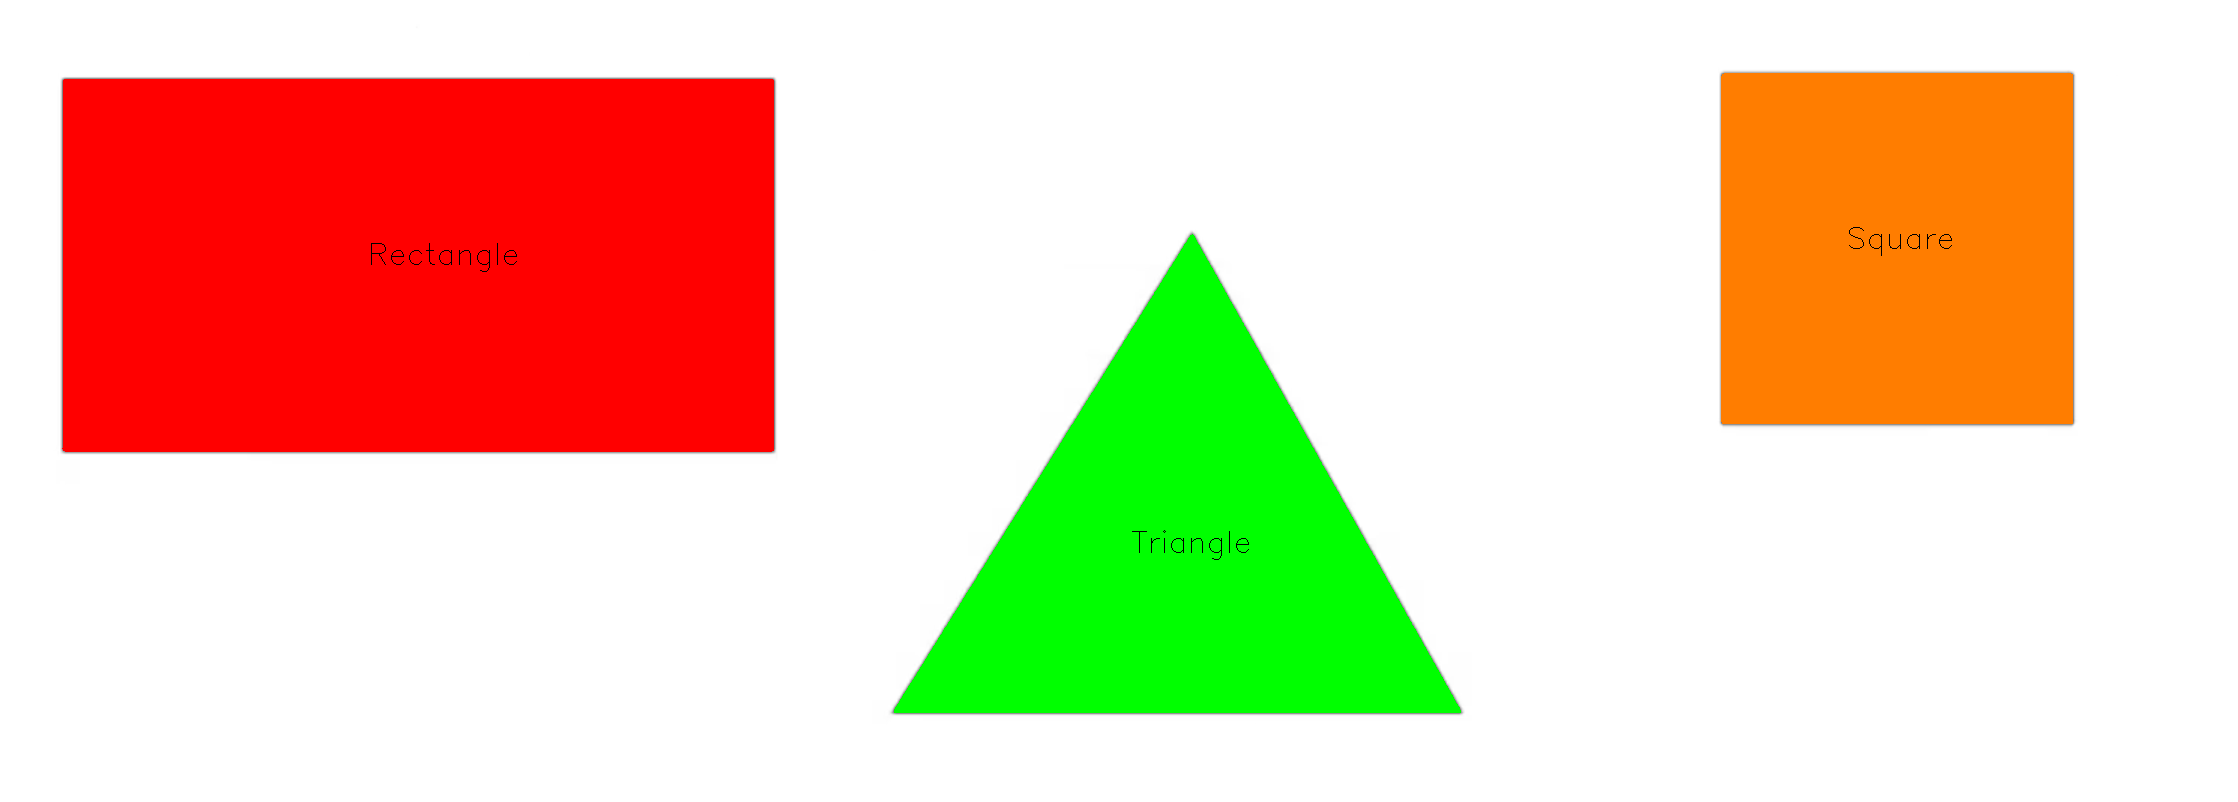

In [ ]:
import numpy as np
import cv2

# Load and then gray scale image

image = cv2.imread('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/MINIPROJECT21.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)
cv2.waitKey(0)

ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        
        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        else:
            shape_name = "Rectangle"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        
        
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)

    cv2_imshow(image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

# 4.6 Line Detection - Using Hough Lines

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/suduko.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/suduko.png',img)

True

Probabilistic Hough Lines

(35, 1, 4)


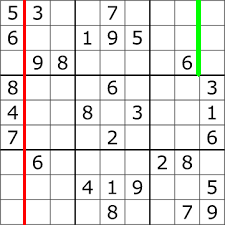

In [ ]:
import cv2
import numpy as np

# Grayscale and Canny Edges extracted
image = cv2.imread('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/suduko.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, 5, 10)
print(lines.shape)

for x1, y1, x2, y2 in lines[0]:
    cv2.line(image, (x1, y1), (x2, y2),(0, 255, 0), 3)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4.7 Circle Detection - Hough Cirlces

In [ ]:
from google.colab.patches import cv2_imshow

Detected circles: 


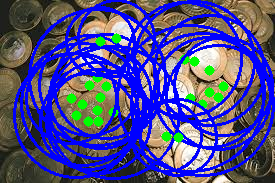

In [ ]:
import cv2
import numpy as np
#import cv2.cv2 as cv

image = cv2.imread('/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT,1.5,10)
#circles = cv2.HoughCircles(gray, cv.CV_HOUGH_GRADIENT, 1, 10)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)
print("Detected circles: ")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4.8 BLOB DETECTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow

Blobs: 


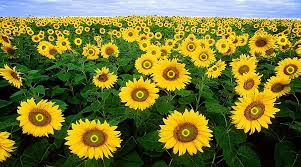

In [ ]:
# Standard imports
import cv2
import numpy as np;
 
# Read image
image = cv2.imread("/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/sunflowers.jpg")
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(image)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,255),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
# Show keypoints
print("Blobs: ")
cv2_imshow(blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4.9 - Mini Project # 3 - Counting Circles and Ellipses


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread("/content/drive/MyDrive/COMPUTER VISION IMAGES/ASSIGNMENT4/blob.png", 0)
print("Original Image")
cv2_imshow(image)
cv2.waitKey(0)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector()
 
# Detect blobs
keypoints = detector.detect(image)
 
# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
print("Blobs using default parameters")
cv2_imshow( blobs)
cv2.waitKey(0)


# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
print("Filtering Circular Blobs Only")
cv2_imshow (blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Image


##  ASSIGNMENT 5

# OpenCV Connecting to a USB Camera or a Laptop Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


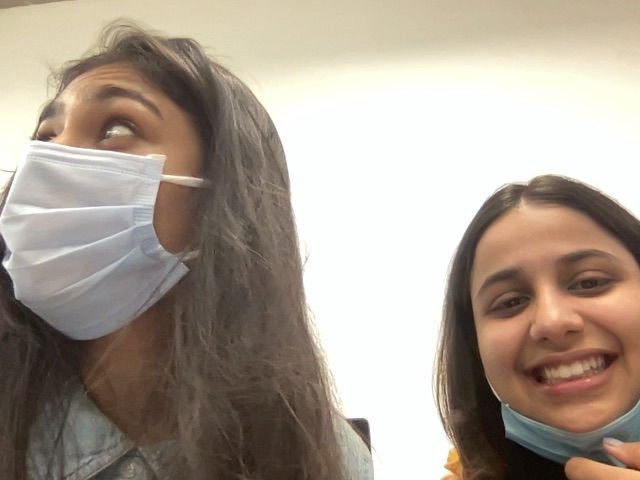

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow
!pip3 install --upgrade numpy

     |████████████████████████████████| 15.7 MB 184 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
## PUT THIS ALL IN ONE CELL!
import numpy as np
import cv2 


# Connects to your computer's default camera
#cap = cv2.VideoCapture(0)
frame=cv2.imread('/content/photo.jpg',0)

# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    

    # Display the resulting frame
    print("frame")
    cv2_imshow(gray)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

error: ignored

# Writing a Video Stream to File

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# MACOS AND LINUX: *'XVID' (MacOS users may want to try VIDX as well just in case)
# WINDOWS *'VIDX'
writer = cv2.VideoWriter('../DATA/student_capture.mp4', cv2.VideoWriter_fourcc(*'XVID'),25, (width, height))


## This loop keeps recording until you hit Q or escape the window
## You may want to instead use some sort of timer, like from time import sleep and then just record for 5 seconds.

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    
    # Write the video
    writer.write(frame)

    # Display the resulting frame
    cv2_imshow(frame)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cap.release()
writer.release()
cv2.destroyAllWindows()

AttributeError: ignored